In [ ]:
!pip install polyfuzz[all]

In [ ]:
from polyfuzz import PolyFuzz

In [ ]:
#Basic Python and Machine learning libraries
import os, sys, warnings, random, time, re, math, string, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from string import punctuation
from collections import Counter,defaultdict
from re import search
from scipy import stats

from wordcloud import WordCloud, STOPWORDS

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# sklearn data science models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, Lasso
from sklearn.svm import LinearSVC
import xgboost as xgb

from bs4 import BeautifulSoup

import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize.casual import casual_tokenize
from nltk.util import ngrams

import spacy

warnings.filterwarnings('ignore')

#tqdm with pandas
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

In [ ]:
upnishdas_topics = np.array([['upanishad', 'advaita', 'vedanta', 'brahman', 'atman', 'samadhi',
        'brahma', 'bhakti', 'sloka', 'hinduism', 'shakti', 'aum',
        'kundalini', 'sutras', 'narayana', 'dualism', 'gayatri',
        'mantras', 'prana', 'meditations', 'upanishads', 'moksha',
        'narasimha', 'vedas', 'puranas', 'acharya', 'oneness', 'veda',
        'meditated', 'saraswati', 'samsara', 'swami', 'yogis',
        'formless', 'gita', 'kriya', 'dharma', 'metaphysical',
        'ramakrishna', 'atma', 'purana', 'rudraksha', 'vishnu', 'shri',
        'devas', 'mudra', 'namah', 'shiva', 'meditation', 'dualistic'],
       ['brahman', 'brahma', 'upanishad', 'vedanta', 'advaita', 'vedas',
        'hinduism', 'brahmins', 'upanishads', 'bhakti', 'puranas',
        'narayana', 'veda', 'swami', 'vishnu', 'atman', 'purana',
        'devas', 'sutras', 'saraswati', 'gita', 'brahmin', 'samadhi',
        'acharya', 'atma', 'kurukshetra', 'ganesha', 'mahabharata',
        'shakti', 'moksha', 'shri', 'arjuna', 'sloka', 'ashram',
        'krishna', 'hanuman', 'narasimha', 'shiva', 'vedic', 'aum',
        'sadhana', 'castes', 'agni', 'siva', 'hindu', 'rishis', 'linga',
        'devotees', 'ramakrishna', 'durga'],
       ['peace', 'peacefulness', 'tranquility', 'peaceful', 'ahimsa',
        'calmness', 'peacefully', 'harmony', 'serenity', 'shanti',
        'dualistic', 'tranquil', 'oneness', 'equanimity', 'meditated',
        'om', 'aum', 'tranquillity', 'war', 'ananda', 'meditation',
        'honour', 'vedanta', 'uniting', 'annihilation', 'dharma',
        'duality', 'gita', 'brahma', 'unifier', 'moksha', 'environment',
        'slokas', 'meditate', 'kindness', 'resolve', 'everlasting',
        'brahmacharya', 'calm', 'protecting', 'intolerance', 'quiet',
        'agitated', 'cease', 'calmly', 'meditates', 'meditating', 'pure',
        'forces', 'contentment'],
       ['virtues', 'virtue', 'virtuous', 'upanishads', 'vedanta',
        'sloka', 'bhakti', 'sages', 'upanishad', 'egoism', 'hymns',
        'vedas', 'pious', 'ablution', 'ganesha', 'lordship', 'sutras',
        'brahma', 'veda', 'hinduism', 'humility', 'brahmins', 'worships',
        'devas', 'devotees', 'egotism', 'mantras', 'worshipping',
        'rudraksha', 'praising', 'brahmacharya', 'brahman', 'puranas',
        'worshipped', 'praise', 'worshiper', 'gayatri', 'katha',
        'advaita', 'beatitude', 'yogas', 'brahmin', 'blessings',
        'worship', 'shakti', 'covet', 'acharya', 'purana', 'mahabharata',
        'worshippers'],
       ['infinity', 'infinite', 'universes', 'universe', 'endless',
        'finite', 'eternity', 'unlimited', 'limitless', 'everlasting',
        'cosmic', 'eternal', 'perpetual', 'boundless', 'transcendental',
        'uncaused', 'immortality', 'omniscience', 'eternally',
        'omnipotence', 'transcendent', 'aeons', 'annihilation',
        'omnipotent', 'undying', 'vedanta', 'indeterminate', 'ceasing',
        'transcendence', 'meditates', 'existence', 'space',
        'incessantly', 'uninterrupted', 'ceaselessly', 'limits',
        'cosmos', 'samsara', 'continuous', 'metaphysical', 'brahma',
        'immeasurable', 'expanding', 'omnipresence', 'realities',
        'oneness', 'indivisible', 'advaita', 'innumerable', 'serenity'],
       ['prana', 'chakras', 'aum', 'om', 'kundalini', 'upanishad',
        'chakra', 'samadhi', 'pineal', 'mantras', 'ears', 'vedanta',
        'shiva', 'brahman', 'rudraksha', 'limbs', 'sloka', 'vitality',
        'devas', 'eyes', 'upanishads', 'bhakti', 'saraswati',
        'celestial', 'brahma', 'gayatri', 'atma', 'mantra', 'ananda',
        'vedas', 'samsara', 'swami', 'maha', 'shakti', 'sanskrit',
        'siva', 'ashram', 'kriya', 'purity', 'formless', 'meditations',
        'yogis', 'atman', 'chanting', 'advaita', 'sutras', 'japa',
        'mudra', 'members', 'meditating'],
       ['pranayama', 'energies', 'yogis', 'pranic', 'samadhi', 'shakti',
        'namah', 'vedic', 'kundalini', 'yogas', 'kriya', 'meditations',
        'dualism', 'mantras', 'surya', 'shiva', 'gayatri', 'meditated',
        'mantra', 'potency', 'capable', 'chakra', 'together', 'chakras',
        'mutual', 'vayu', 'meditation', 'narayana', 'asanas', 'energy',
        'lakshmi', 'mire', 'mudra', 'ananda', 'aum', 'unite', 'brahma',
        'rudraksha', 'simultaneously', 'adjunct', 'maha', 'vedas',
        'sustains', 'japa', 'ramakrishna', 'prarabdha', 'yogic', 'swami',
        'sloka', 'ahimsa'],
       ['vedas', 'upanishad', 'brahman', 'narayana', 'swami', 'vedanta',
        'bhakti', 'gita', 'brahma', 'hinduism', 'advaita', 'veda',
        'saraswati', 'samadhi', 'shakti', 'upanishads', 'maha',
        'puranas', 'katha', 'acharya', 'agni', 'hanuman', 'vishnu',
        'devas', 'sadhana', 'sanskrit', 'mahabharata', 'vedic',
        'ramakrishna', 'rama', 'mantras', 'shri', 'durga', 'purana',
        'sloka', 'kundalini', 'brahmins', 'japa', 'krishna', 'narasimha',
        'sutras', 'aum', 'kurukshetra', 'hindu', 'rudraksha', 'devotees',
        'ashram', 'patanjali', 'linga', 'crore'],
       ['verbally', 'verbal', 'truths', 'uttered', 'truthful',
        'utterance', 'insult', 'dharmis', 'believes', 'absolute',
        'concludes', 'uttering', 'declares', 'behaves', 'utterances',
        'accurate', 'muttered', 'affirmation', 'truest', 'untrue',
        'mantra', 'ultimately', 'affirming', 'pronouncing', 'thoughts',
        'knower', 'implied', 'negation', 'worst', 'assent', 'words',
        'communicate', 'anything', 'calmly', 'statements', 'true',
        'speech', 'saying', 'discourse', 'describe', 'expressions',
        'eloquent', 'innermost', 'siddhis', 'misconception',
        'quintessence', 'speaks', 'silently', 'proclaim', 'lauds'],
       ['denial', 'denying', 'deny', 'calmly', 'reject', 'refuse',
        'refused', 'denied', 'lie', 'dismiss', 'believing', 'delusion',
        'accept', 'solely', 'accepting', 'deluding', 'inevitable',
        'blindly', 'foolishness', 'unaware', 'naught', 'ignorance',
        'misconception', 'negation', 'unfettered', 'fail', 'disregard',
        'rejecting', 'forsake', 'conviction', 'untruth', 'insisting',
        'falsehood', 'prove', 'affirming', 'rejoice', 'cessation',
        'boundless', 'exist', 'annihilation', 'detachment',
        'meaningless', 'uninitiated', 'falsely', 'fools', 'silently',
        'uncaused', 'avoided', 'negated', 'rejection'],
       ['thyself', 'self', 'oneself', 'ourselves', 'egoism', 'ourself',
        'thine', 'detachment', 'feels', 'selfishness', 'introspective',
        'himself', 'conceited', 'ego', 'kundalini', 'feel', 'yourself',
        'laziness', 'unmani', 'sentient', 'illusory', 'egotism',
        'yourselves', 'individuality', 'sentience', 'forsake', 'longing',
        'yours', 'subconscious', 'vedanta', 'thy', 'meditating',
        'blindly', 'vain', 'yearn', 'contempt', 'awaken', 'conceit',
        'meditate', 'renouncing', 'believing', 'hypocrisy', 'egocentric',
        'humility', 'embody', 'envy', 'unite', 'manifests', 'aspirant',
        'delusion'],
       ['protect', 'protecting', 'protects', 'protector', 'protection',
        'protectors', 'protected', 'guard', 'guards', 'ananda',
        'speaker', 'indestructible', 'secure', 'sloka', 'embody',
        'lords', 'safety', 'guarded', 'restrain', 'rudra', 'purifier',
        'threatening', 'narayana', 'hanuman', 'preserving', 'powerful',
        'subdue', 'maha', 'security', 'restraining', 'purifying',
        'purify', 'securing', 'moisture', 'sustains', 'safe', 'vedanta',
        'invincible', 'prevent', 'ishvara', 'namah', 'atman',
        'empowerment', 'keeps', 'vayu', 'prof', 'secures', 'devas',
        'teacher', 'hide'],
       ['peace', 'tranquility', 'peaceful', 'peacefulness', 'peacefully',
        'om', 'honour', 'calmness', 'tranquil', 'serenity', 'meditated',
        'shanti', 'meditation', 'harmony', 'ahimsa', 'meditate',
        'meditating', 'dualistic', 'calmly', 'meditates', 'calm',
        'tranquillity', 'oneness', 'everlasting', 'quiet', 'mandala',
        'serene', 'cease', 'agitated', 'happiness', 'buddhists',
        'boundless', 'aum', 'samadhi', 'equanimity', 'contentment',
        'samsara', 'sadhana', 'forgiveness', 'patience', 'buddhist',
        'buddha', 'buddhism', 'dharma', 'ananda', 'abundance', 'pure',
        'meditations', 'holiness', 'sura'],
       ['ye', 'manmatha', 'un', 'on', 'fig', 'an', 'uu', 'way',
        'actually', 'has', 'of', 'hum', 'not', 'in', 'upon', 'so', 'ya',
        'it', 'is', 'one', 'yo', 'at', 'shut', 'got', 'out', 'what',
        'no', 'have', 'the', 'am', 'there', 'over', 'by', 'lo', 'bit',
        'na', 'had', 'was', 'stated', 'quite', 'aright', 'been', 'along',
        'are', 'said', 'vasistha', 'sukta', 'ah', 'encasing', 'dire']])

gita_topics = np.array([['devotion', 'souls', 'deathless', 'soul', 'kunti', 'eternal',
        'om', 'brahma', 'holiness', 'karna', 'yog', 'steadfast', 'vedas',
        'sinless', 'dwells', 'piety', 'hymns', 'praise', 'toil', 'deeds',
        'krishna', 'equanimity', 'virtue', 'immortal', 'worship', 'doth',
        'serenity', 'reverence', 'pious', 'sacrifice', 'rishis', 'lord',
        'arjuna', 'meditation', 'scorn', 'renunciation', 'enlightened',
        'despair', 'darkness', 'doers', 'righteousness', 'sins',
        'spirit', 'honour', 'wisest', 'faithful', 'perish', 'blessed',
        'lords', 'desires'],
       ['praise', 'hail', 'cometh', 'doth', 'glorious', 'yours', 'unto',
        'dear', 'mortals', 'cease', 'yourself', 'adoring', 'arise',
        'gods', 'himself', 'strive', 'glory', 'lords', 'rightful',
        'deathless', 'quit', 'eternal', 'honourable', 'perish',
        'worship', 'lie', 'worships', 'renouncing', 'seek', 'abide',
        'mightiest', 'fight', 'master', 'brings', 'sees', 'gladly',
        'reach', 'scorn', 'slay', 'witless', 'perfectness', 'sacrifice',
        'majesty', 'vanquished', 'earthly', 'devotion', 'worshipping',
        'steadfast', 'fail', 'minds'],
       ['wisest', 'wisdom', 'wise', 'knowledge', 'sage', 'knows',
        'ignorance', 'enlightened', 'intellect', 'known', 'knowing',
        'senses', 'truths', 'comprehend', 'informed', 'doers', 'learn',
        'learning', 'know', 'perceive', 'comprehending', 'witless',
        'doth', 'minds', 'doubts', 'qualities', 'vedas', 'truthfulness',
        'minded', 'adoring', 'taught', 'subtle', 'twain', 'blinding',
        'scorn', 'pious', 'speak', 'teach', 'doubt', 'sense',
        'blessedness', 'foes', 'sees', 'foolish', 'mastery', 'blind',
        'equanimity', 'karna', 'lore', 'arrogance'],
       ['arjuna', 'karna', 'krishna', 'vishnu', 'arjun', 'kunti',
        'indra', 'vedas', 'asuras', 'brahma', 'rishis', 'bhishma',
        'tamas', 'yogi', 'yog', 'amrit', 'vyasa', 'rajas', 'pious',
        'vasudev', 'bharata', 'drona', 'mortals', 'gods', 'mystic',
        'mortal', 'sage', 'devotion', 'meditating', 'deathless', 'alms',
        'piety', 'purusha', 'lords', 'lord', 'praise', 'sacred', 'wilt',
        'slayer', 'meditation', 'om', 'penance', 'valiant',
        'worshipping', 'mightiest', 'dost', 'indian', 'worships',
        'divine', 'lore'],
       ['prince', 'royal', 'king', 'karna', 'arjun', 'adoring',
        'krishna', 'kingly', 'lord', 'grant', 'kings', 'honourable',
        'majesty', 'sovereign', 'master', 'arjuna', 'wilt', 'hail',
        'kunti', 'amrit', 'honour', 'earthly', 'kingdom', 'immortal',
        'vow', 'kinsmen', 'chief', 'praise', 'asuras', 'aught', 'rishis',
        'weak', 'yogi', 'noble', 'valiant', 'mightiest', 'vishnu',
        'alone', 'worships', 'yog', 'power', 'bhishma', 'arrogance',
        'lords', 'blow', 'wild', 'wish', 'brave', 'kin', 'steadfast']])

In [ ]:
upnishdas_topics_list = list(upnishdas_topics)
gita_topics_list = list(gita_topics)
print(len(upnishdas_topics_list), len(gita_topics_list))

14 5


In [ ]:
upn_list, git_list = upnishdas_topics_list[1], gita_topics_list[0]
upn_list, git_list = list(upn_list), list(git_list)
model = PolyFuzz("EditDistance")
model.match(upn_list, git_list)
model.get_matches()

,From,To,Similarity
0,brahman,brahma,0.923077
1,brahma,brahma,1.000000
2,upanishad,praise,0.600000
3,vedanta,vedas,0.666667
4,advaita,steadfast,0.500000
5,vedas,vedas,1.000000
6,hinduism,holiness,0.500000
7,brahmins,hymns,0.720000
8,upanishads,praise,0.600000
9,bhakti,toil,0.600000


### Precision is here defined as the minimum similarity score before a match is correct 
### Recall the percentage of matches found at a certain minimum similarity score.
### KDE Plot
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.



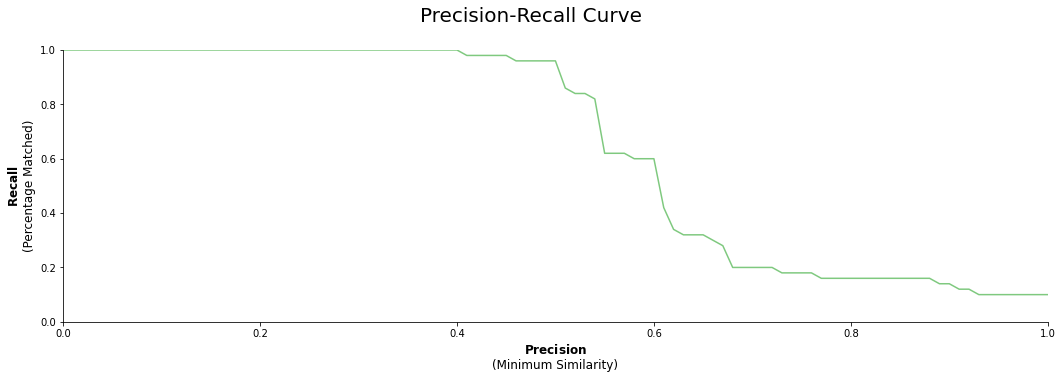

In [ ]:
model.visualize_precision_recall()

In [10]:
#transformers based comparison
from polyfuzz.models import EditDistance, TFIDF, Embeddings
from flair.embeddings import TransformerWordEmbeddings

embeddings = TransformerWordEmbeddings('bert-base-multilingual-cased')
bert = Embeddings(embeddings, min_similarity=0, model_id="BERT")
tfidf = TFIDF(min_similarity=0, model_id="tfidf")
edit = EditDistance(model_id="edit")

string_models = [bert, tfidf, edit]
model = PolyFuzz(string_models)
model.match(upn_list, git_list)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
model.get_matches("BERT")

,From,To,Similarity
0,brahman,brahma,0.956
1,brahma,brahma,1.000
2,upanishad,krishna,0.647
3,vedanta,vedas,0.927
4,advaita,devotion,0.693
5,vedas,vedas,1.000
6,hinduism,meditation,0.601
7,brahmins,brahma,0.976
8,upanishads,krishna,0.641
9,bhakti,dwells,0.706


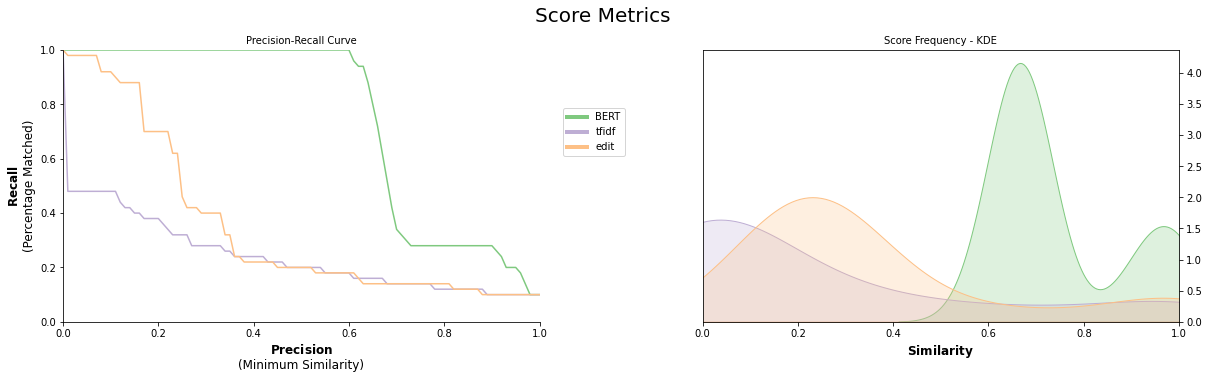

In [12]:
model.visualize_precision_recall(kde=True)

### upnishdas and gita comparison

In [13]:
im_path = '/content/drive/MyDrive/intern-unsw/assets/imgs/kde_gita_upn'

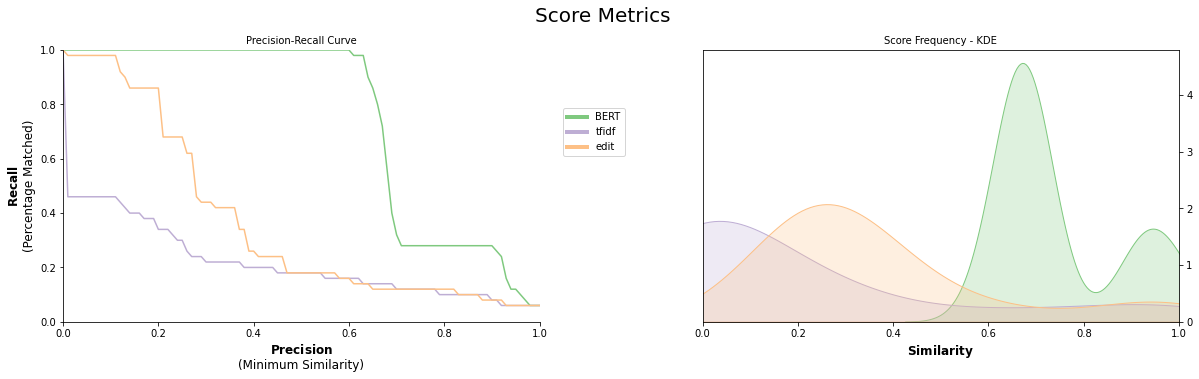

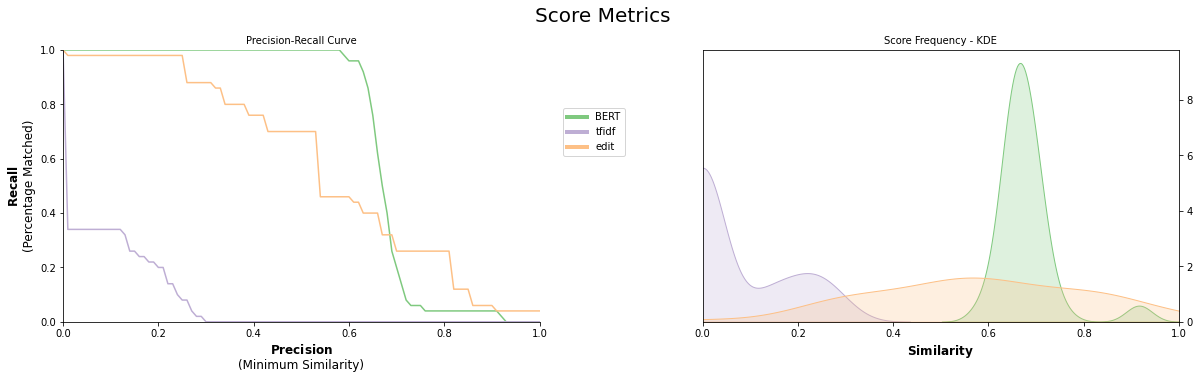

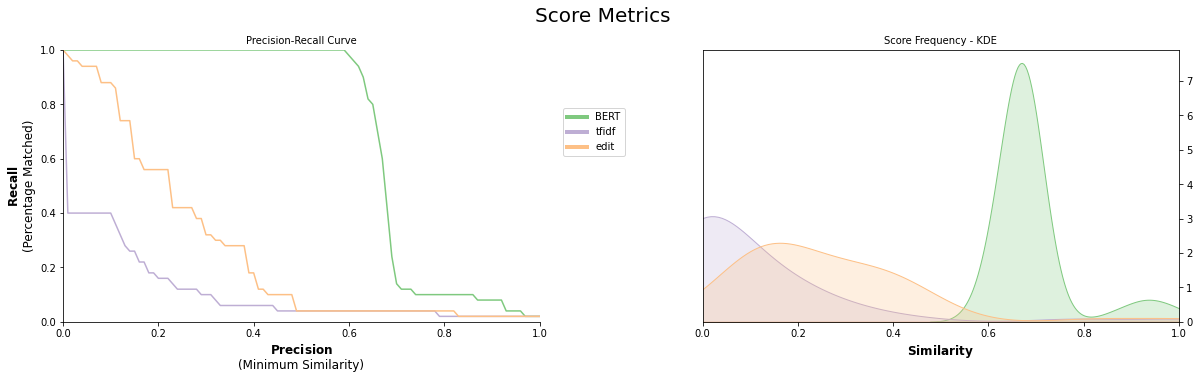

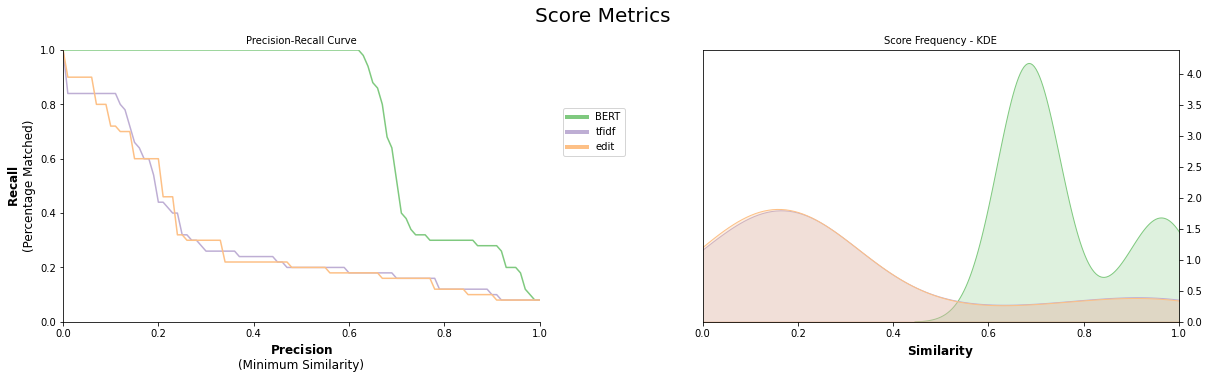

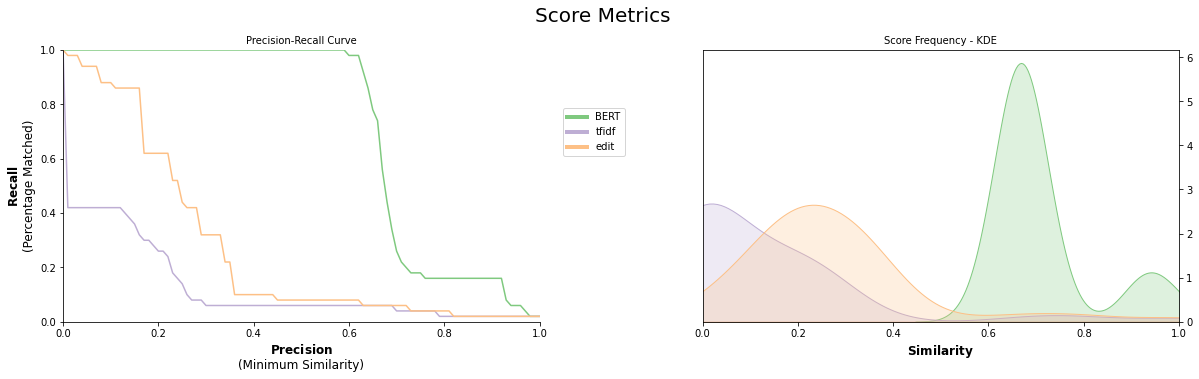

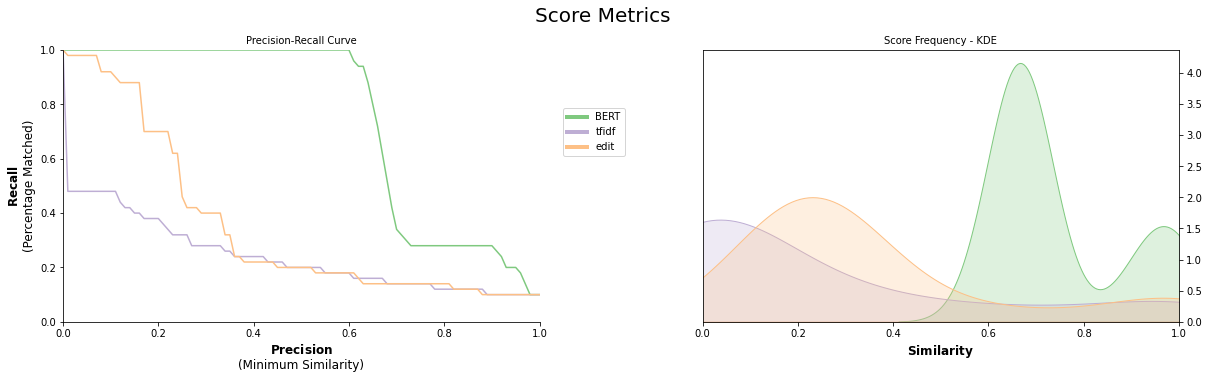

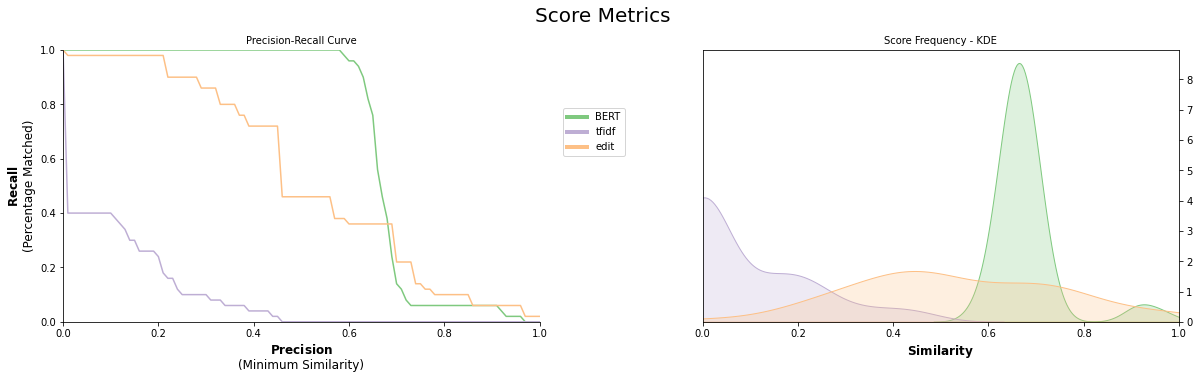

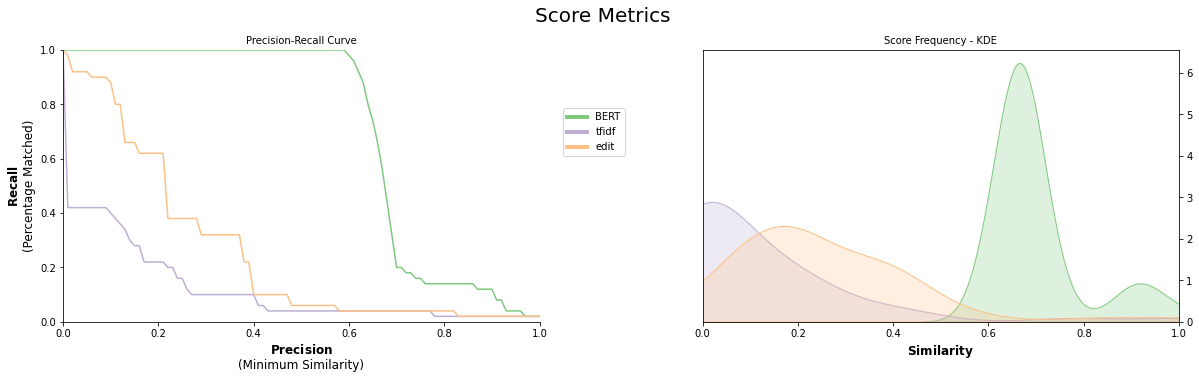

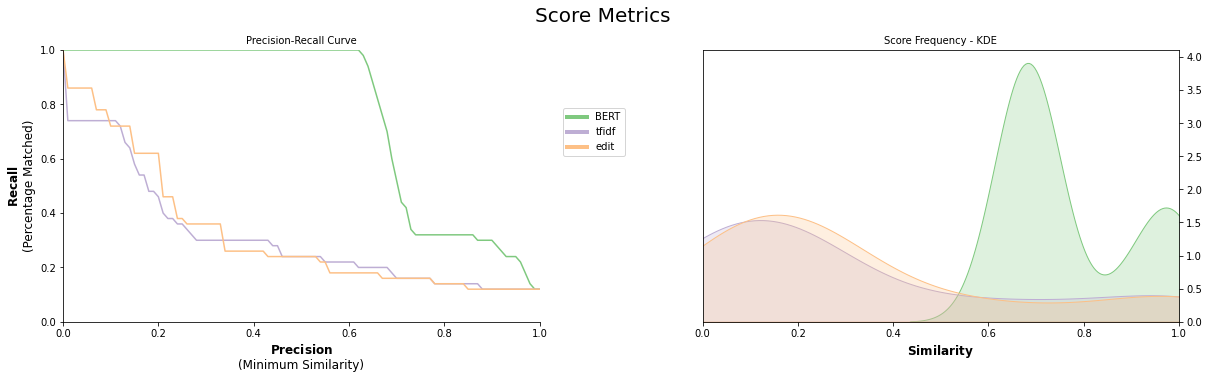

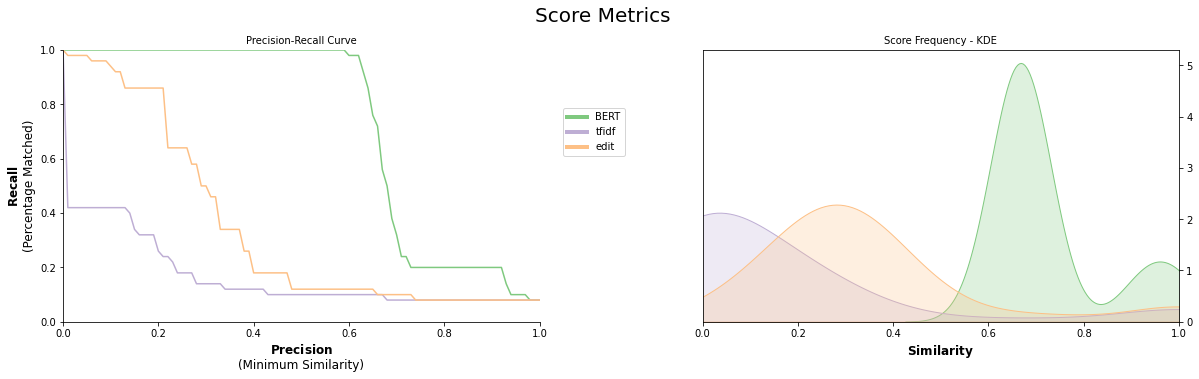

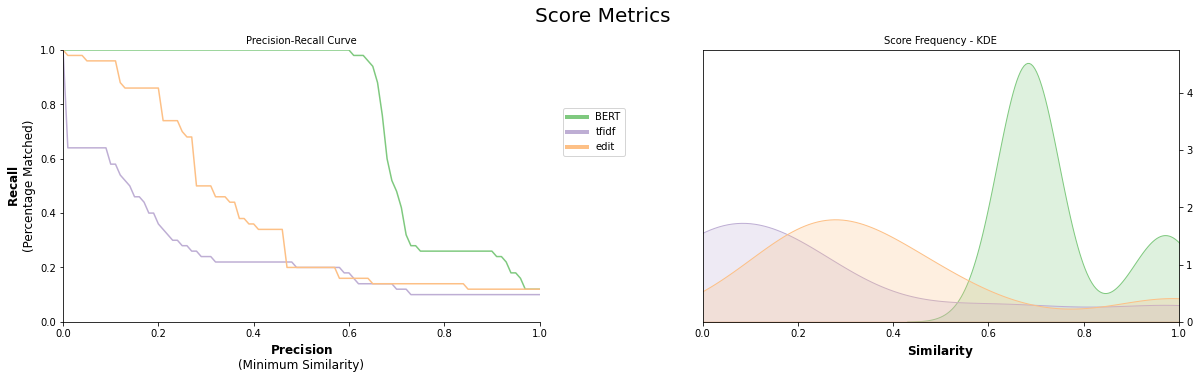

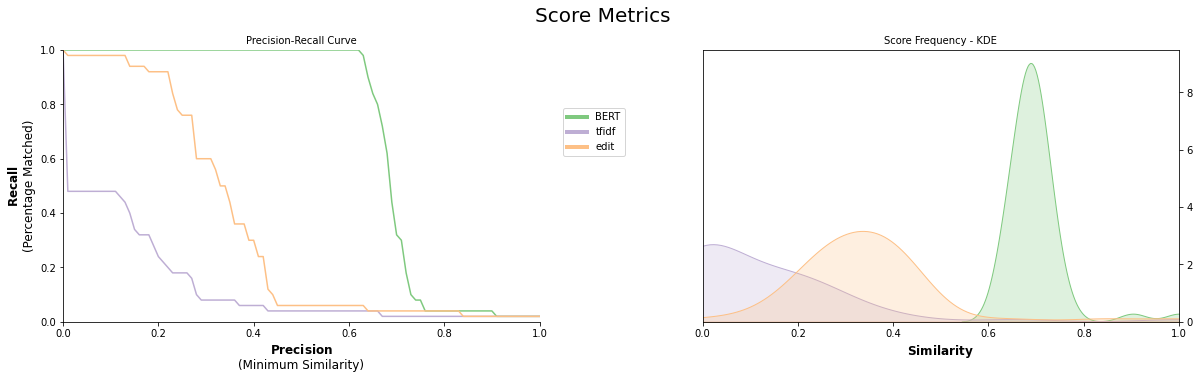

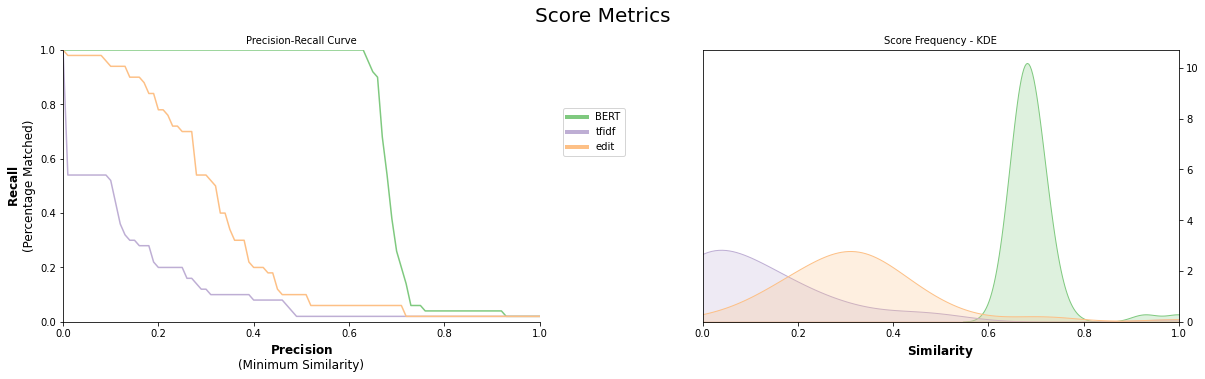

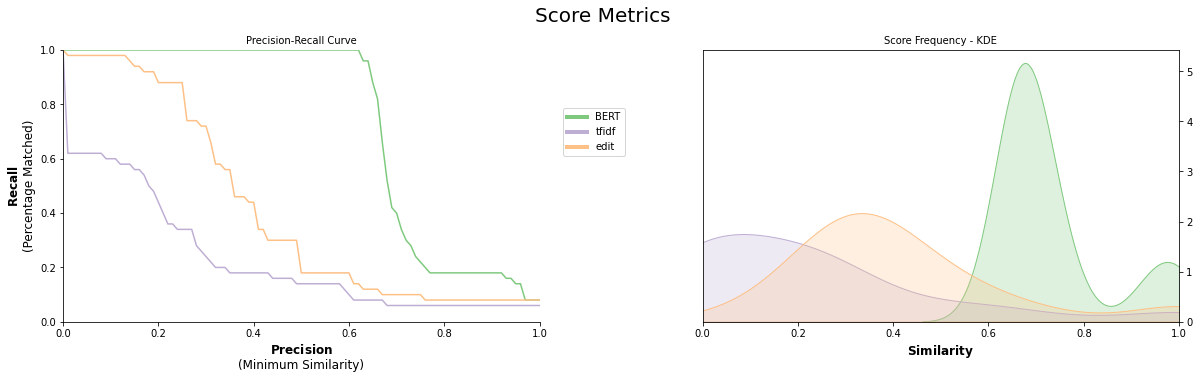

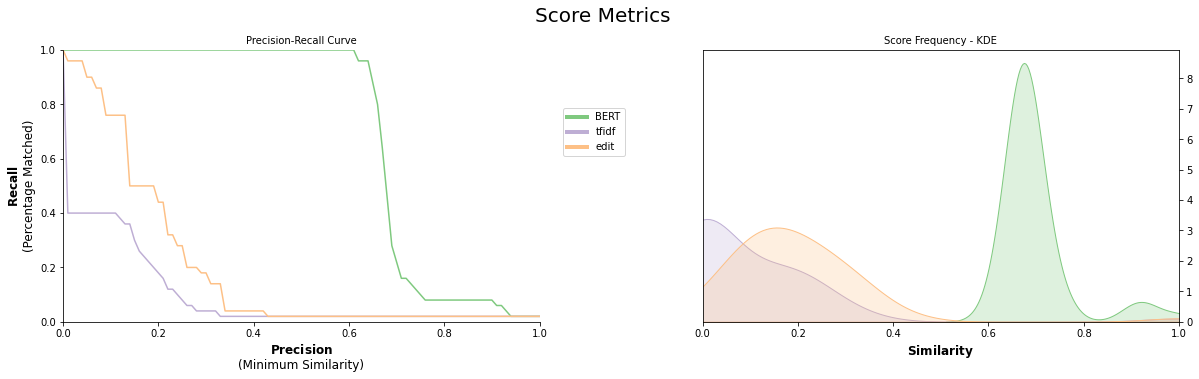

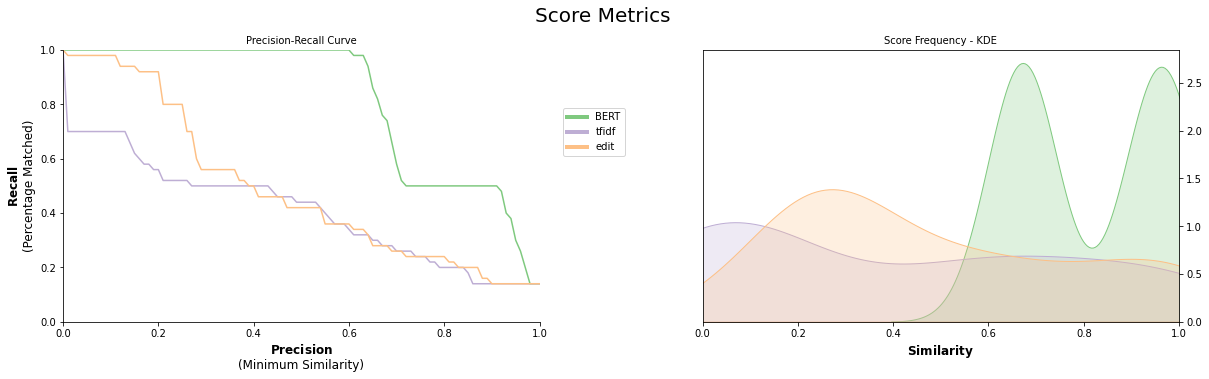

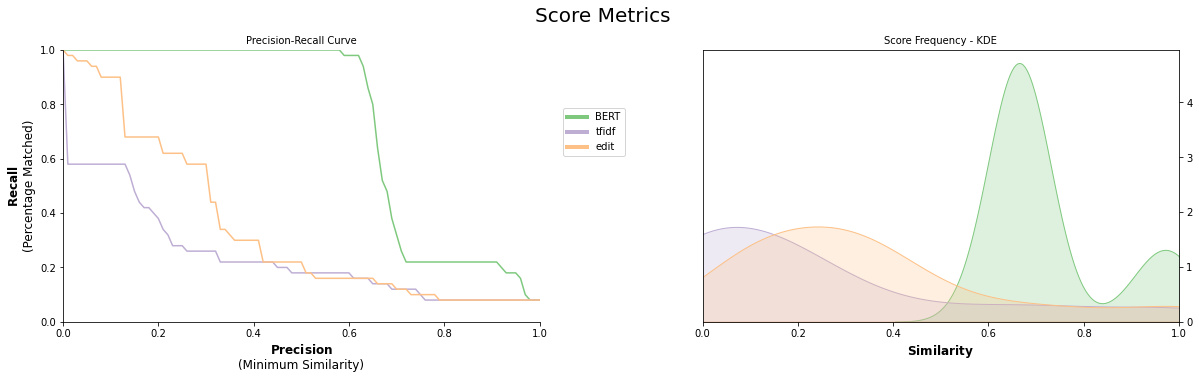

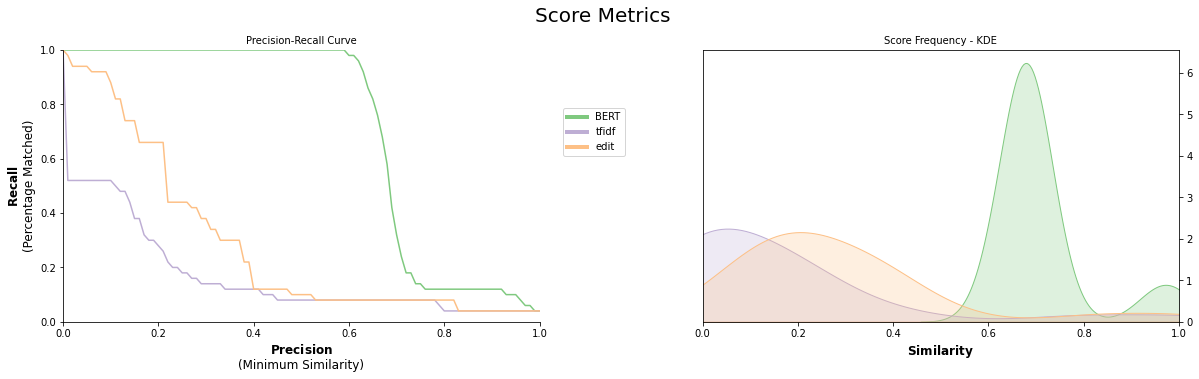

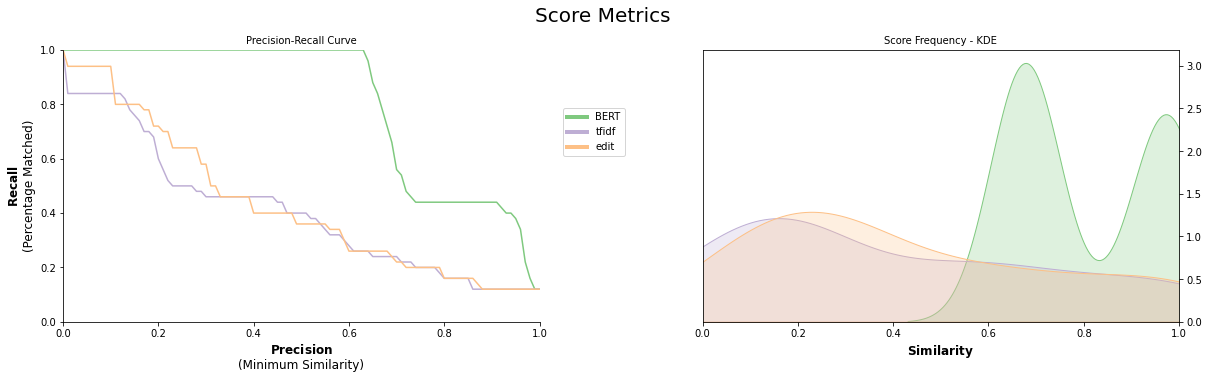

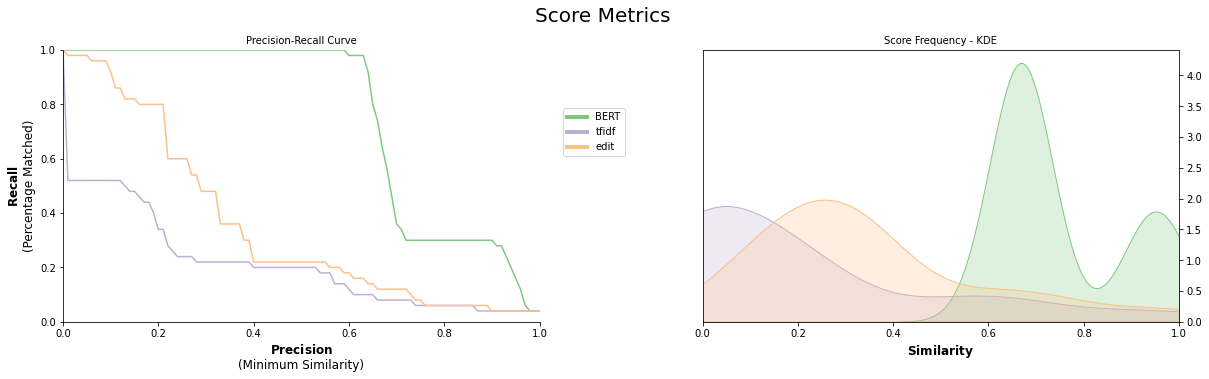

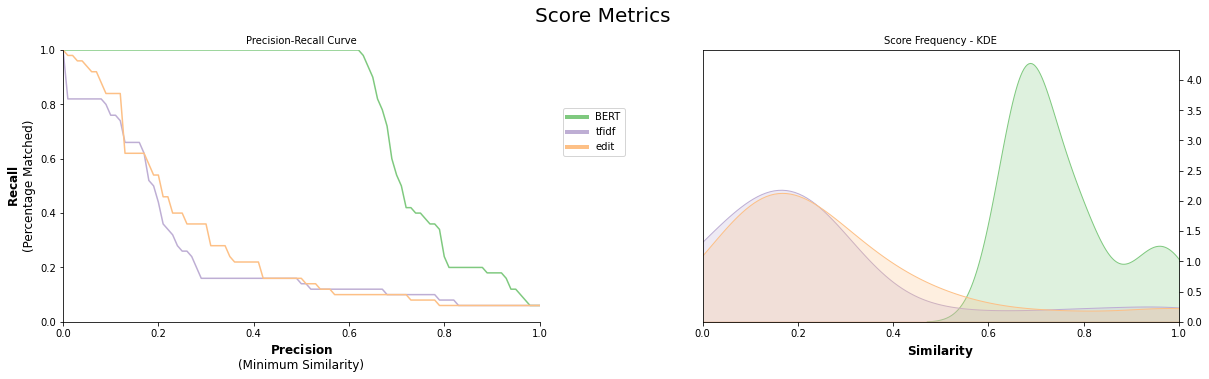

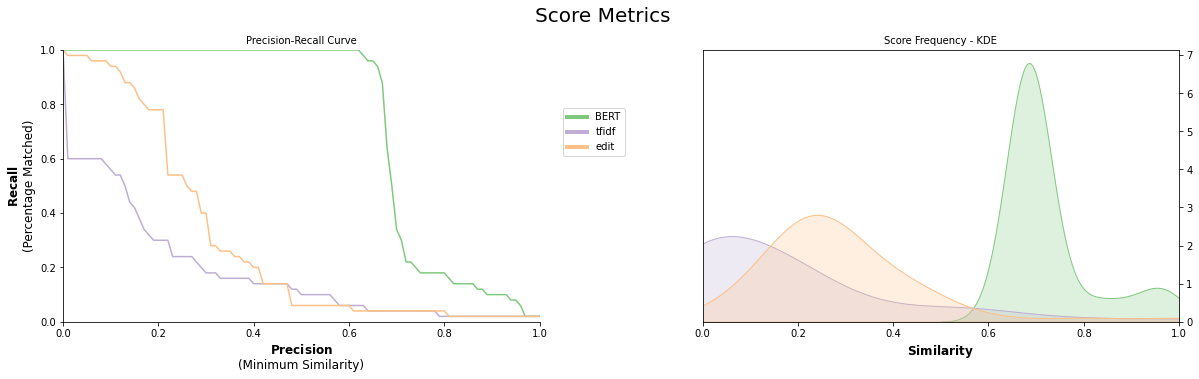

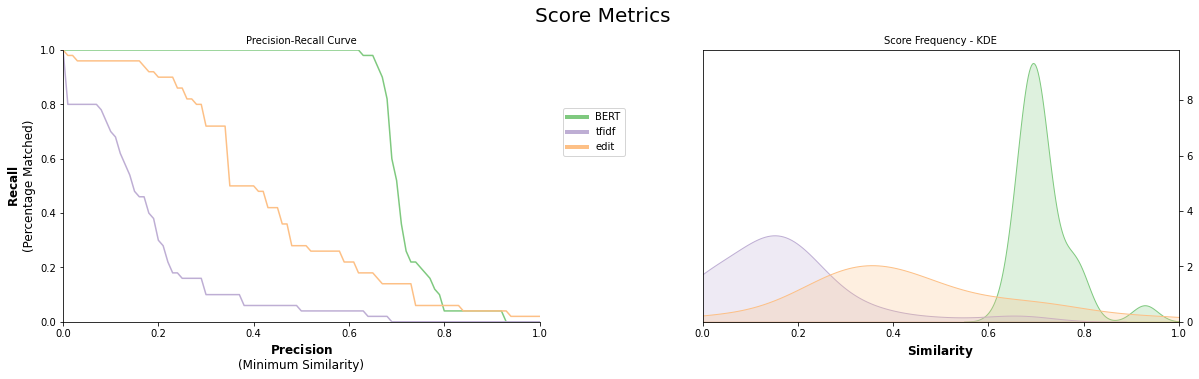

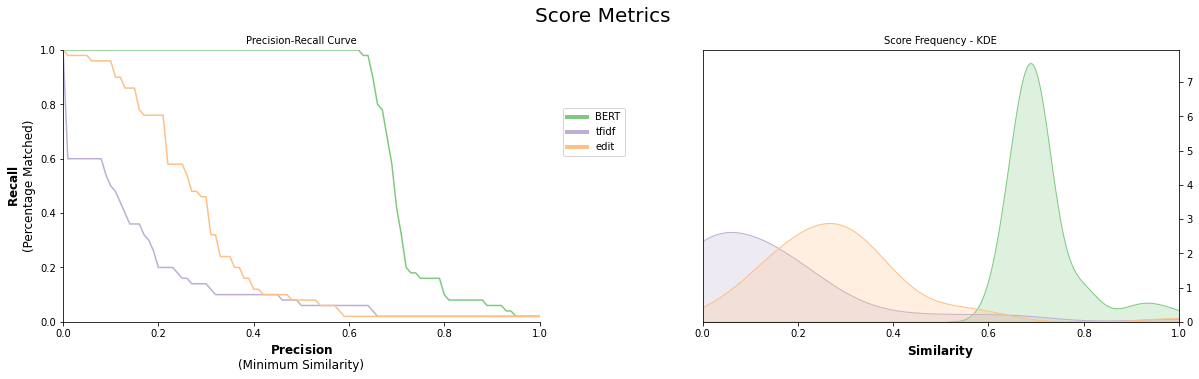

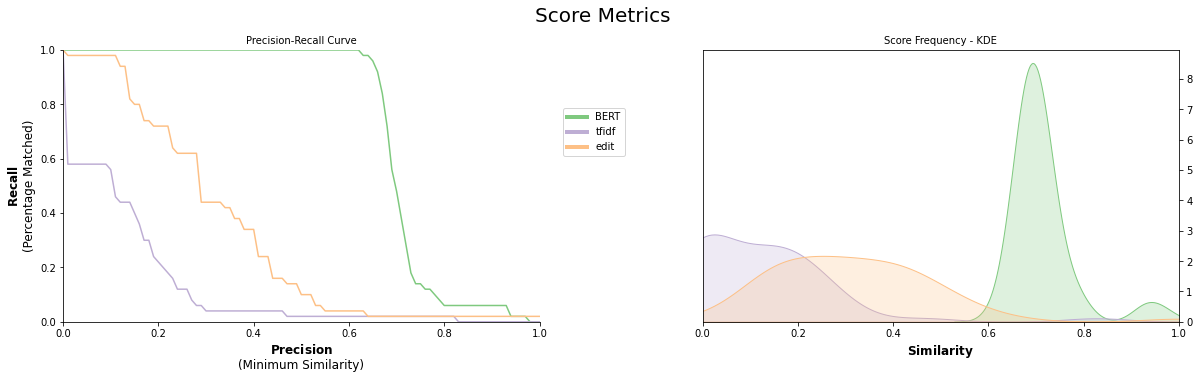

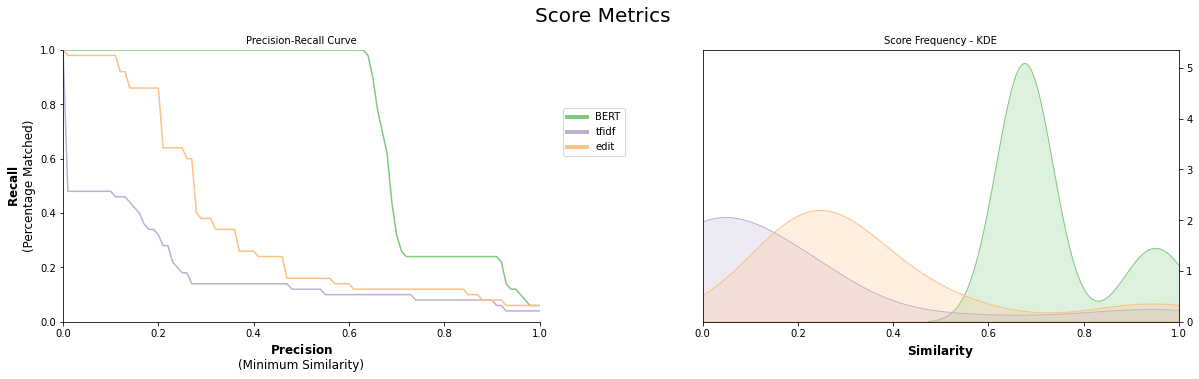

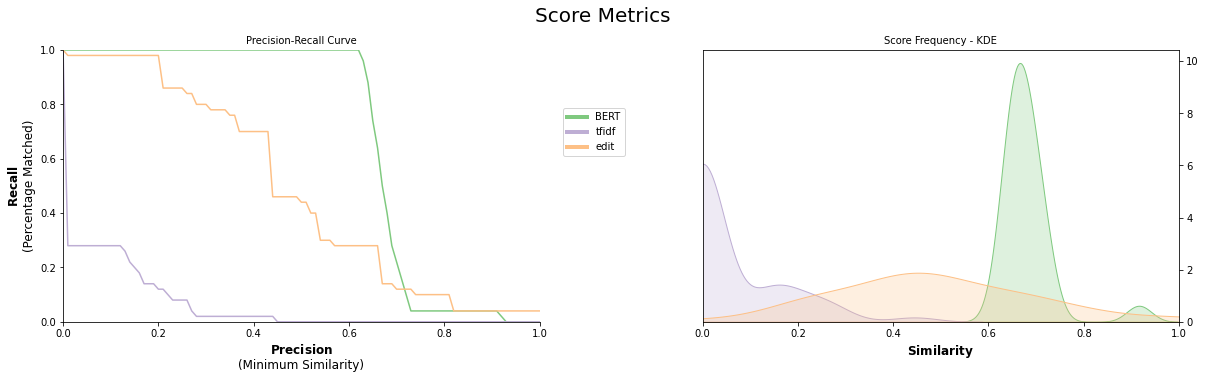

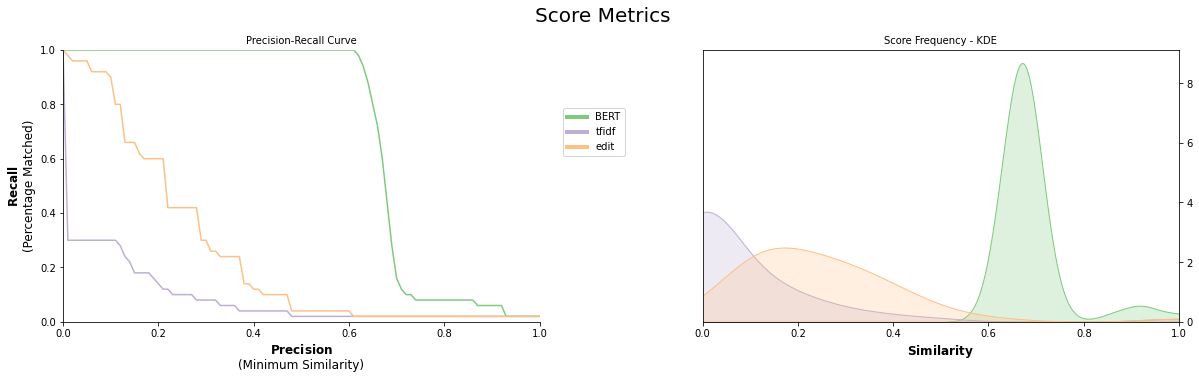

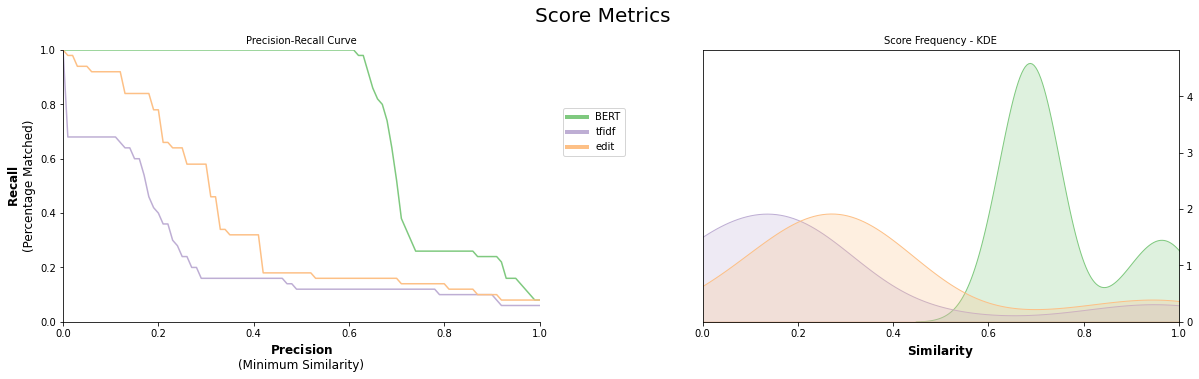

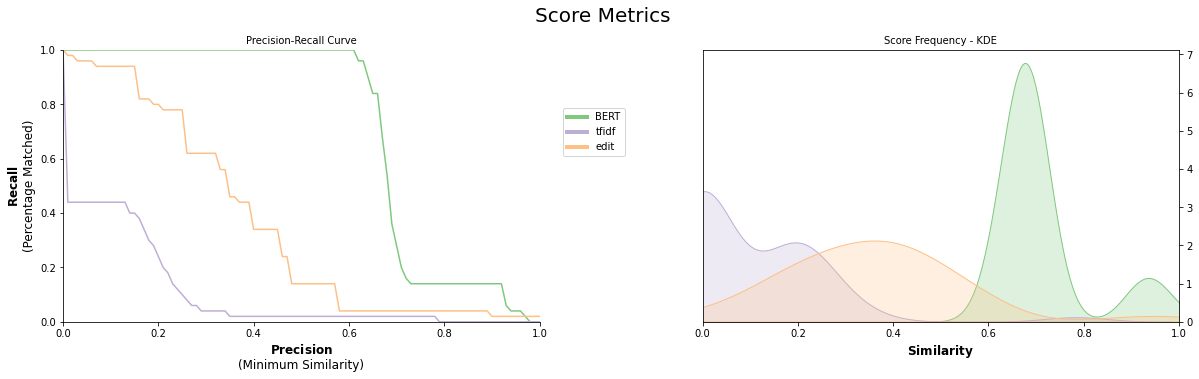

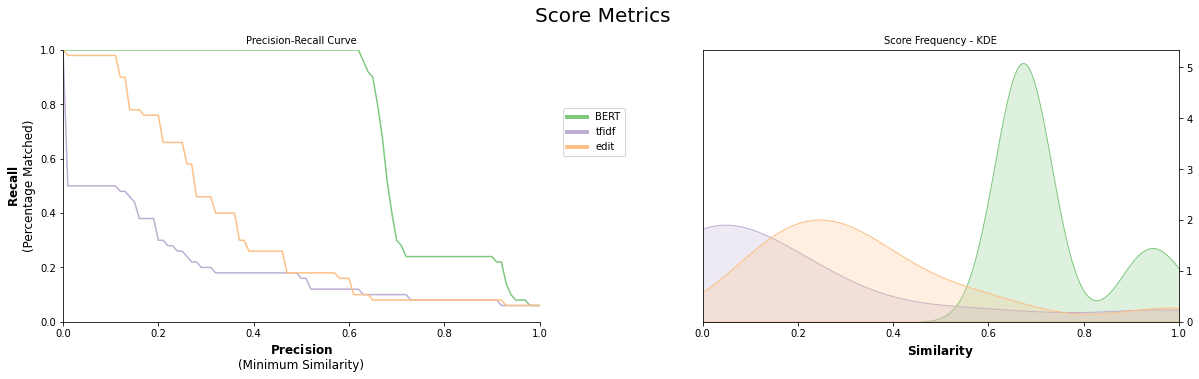

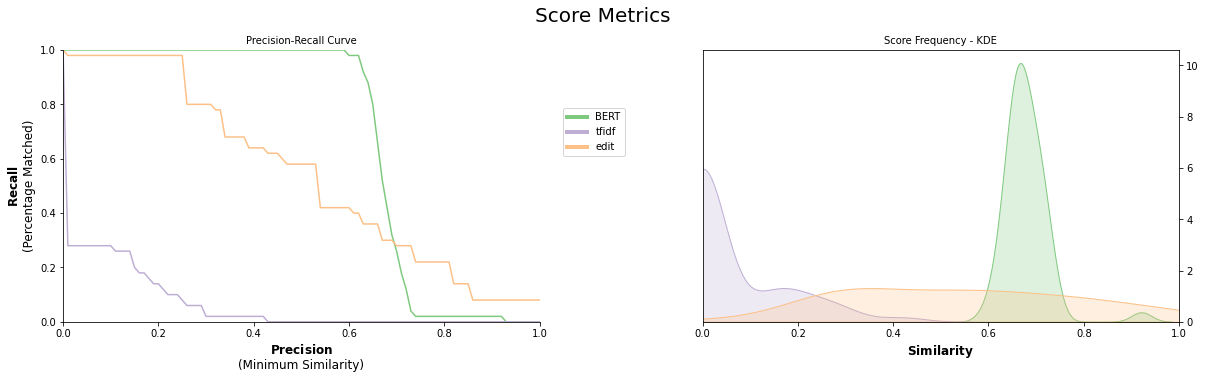

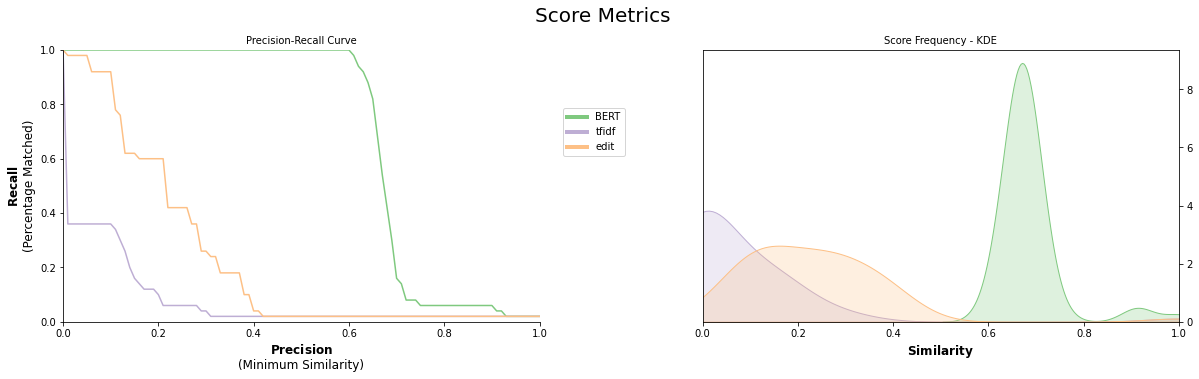

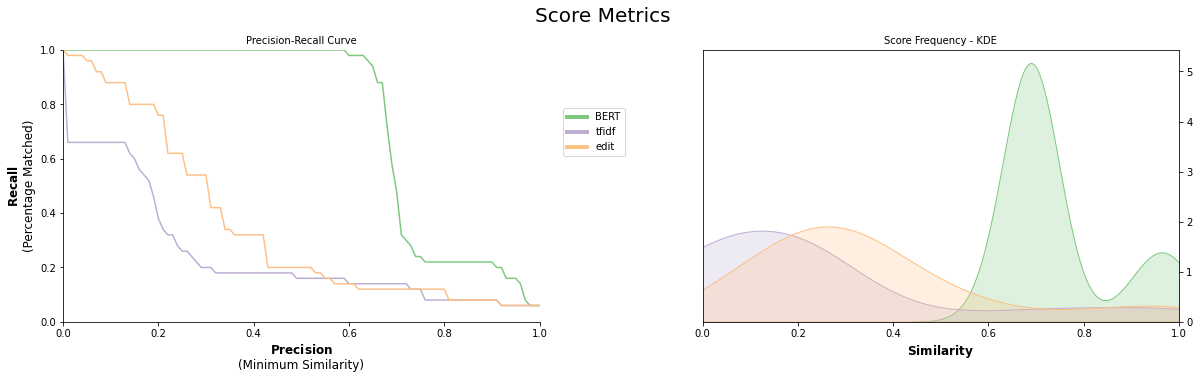

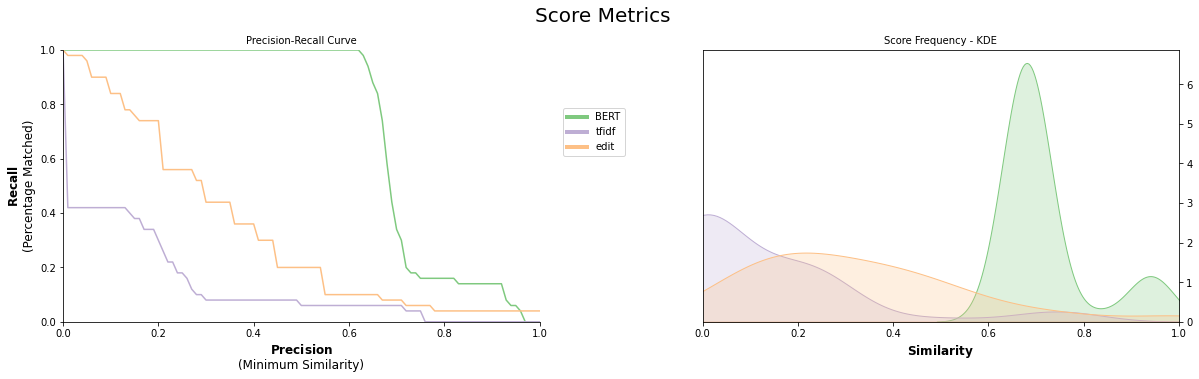

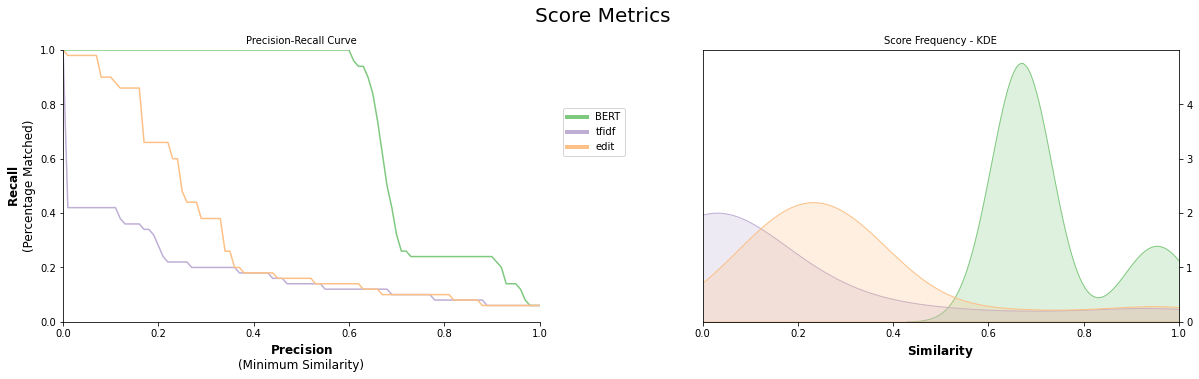

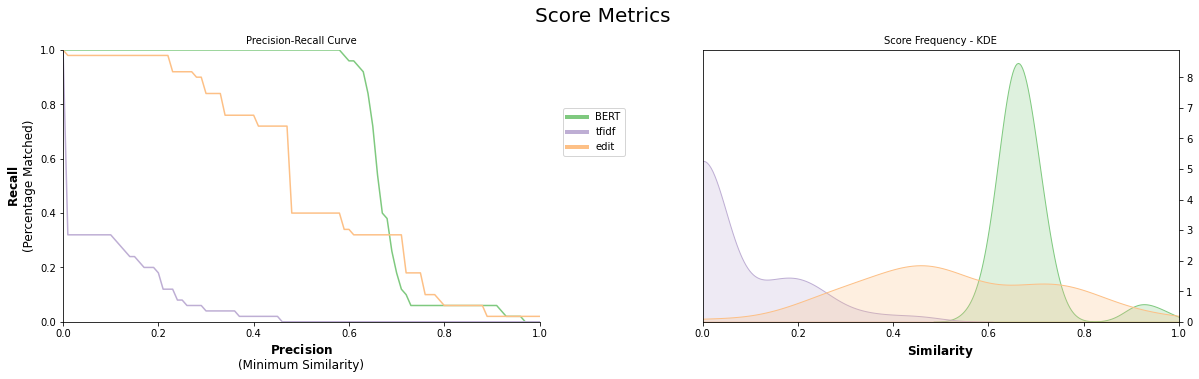

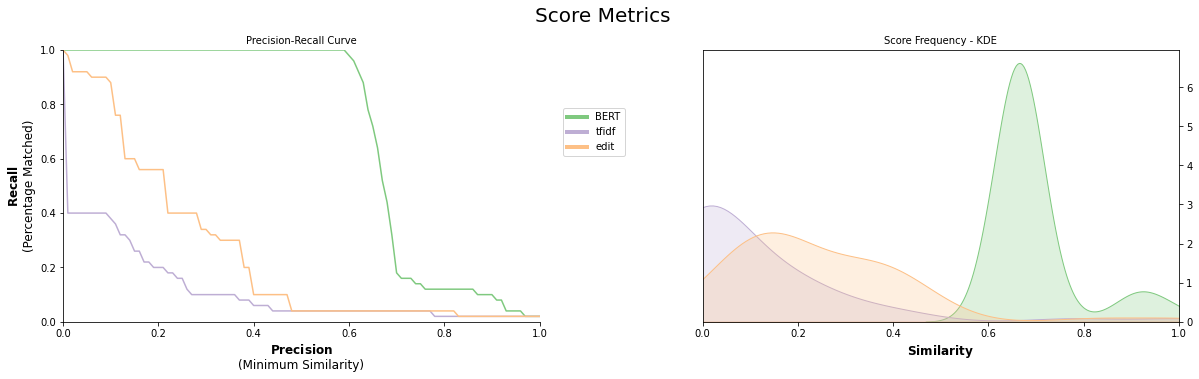

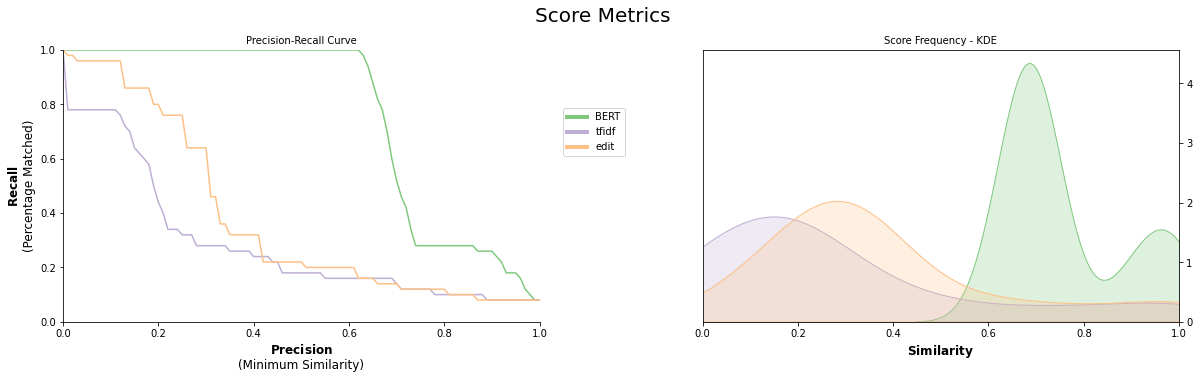

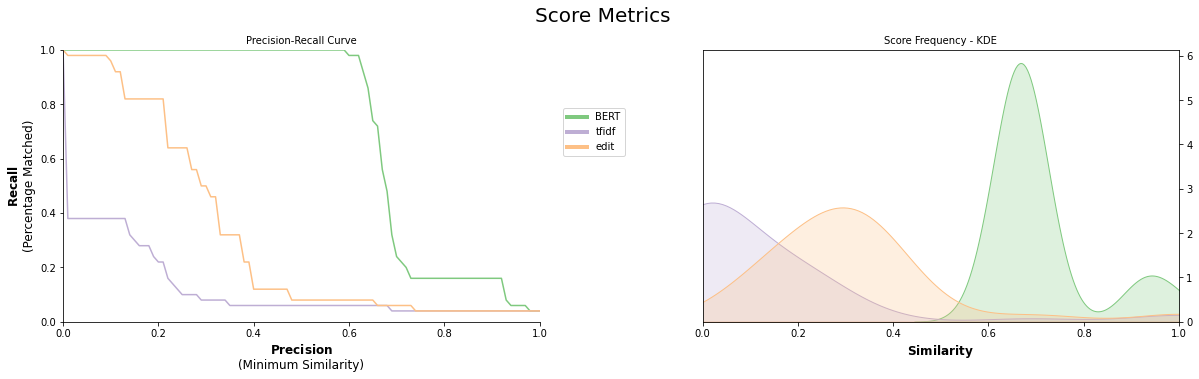

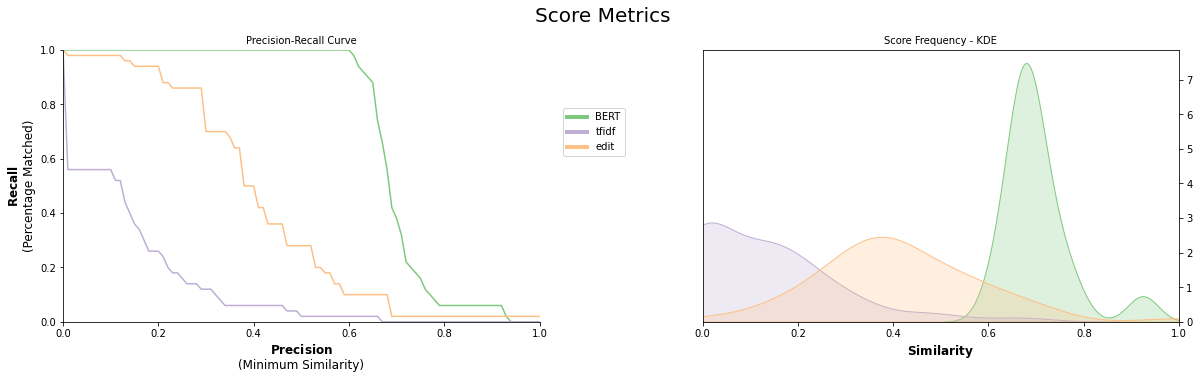

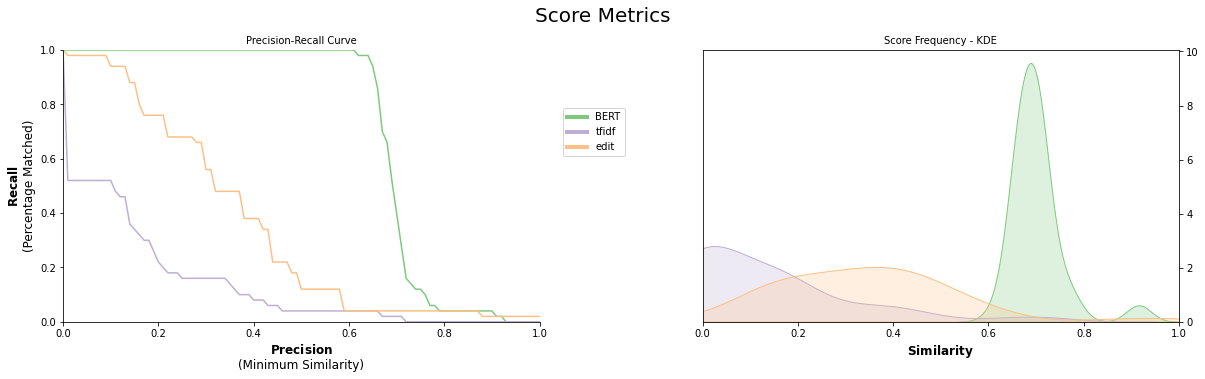

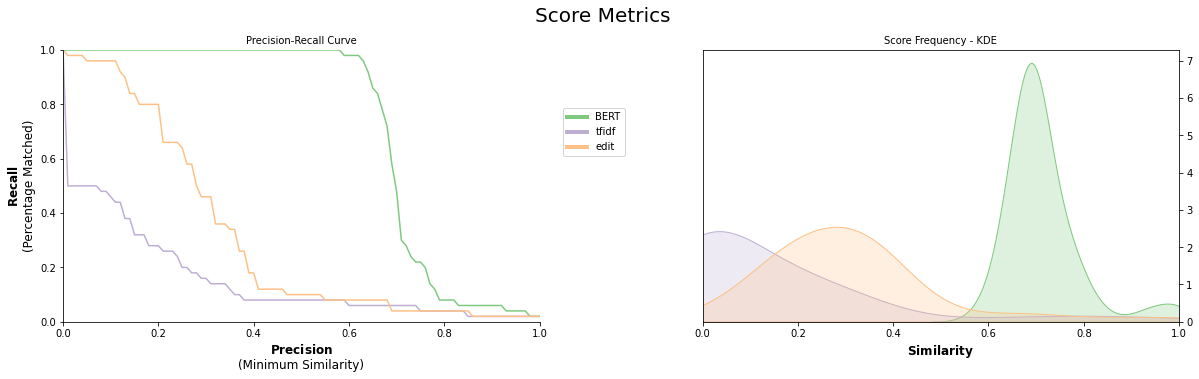

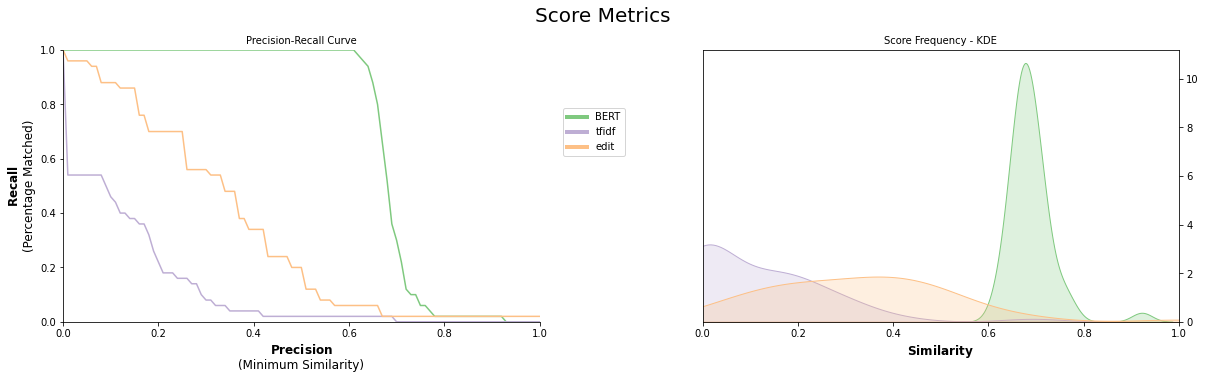

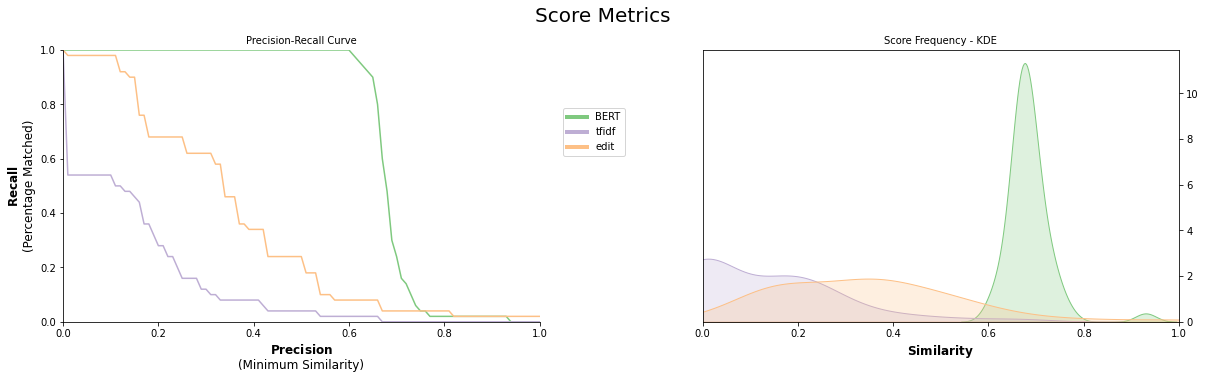

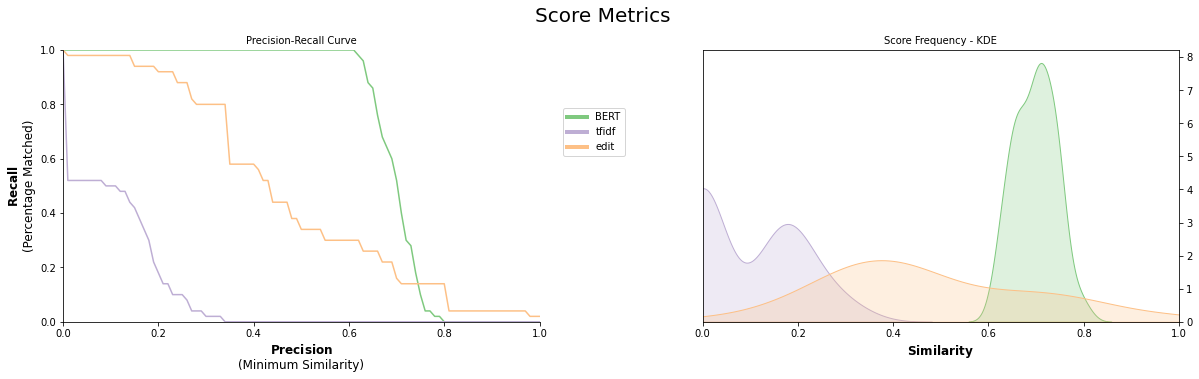

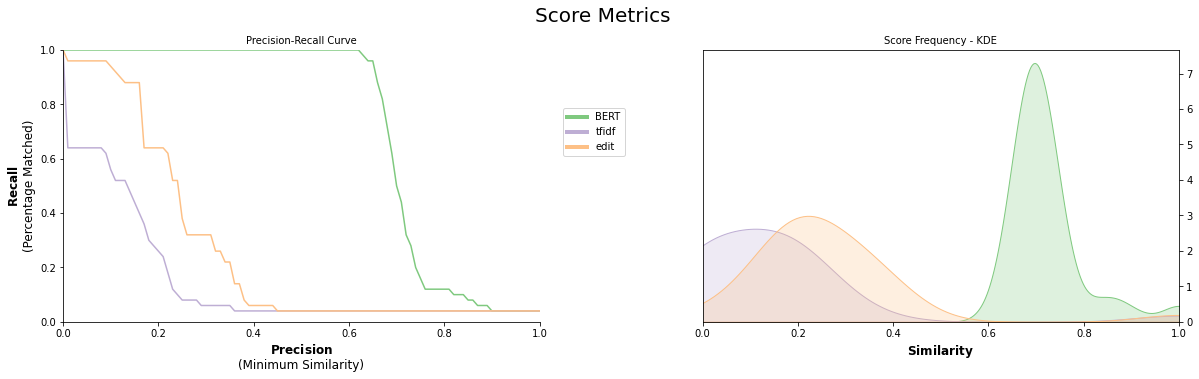

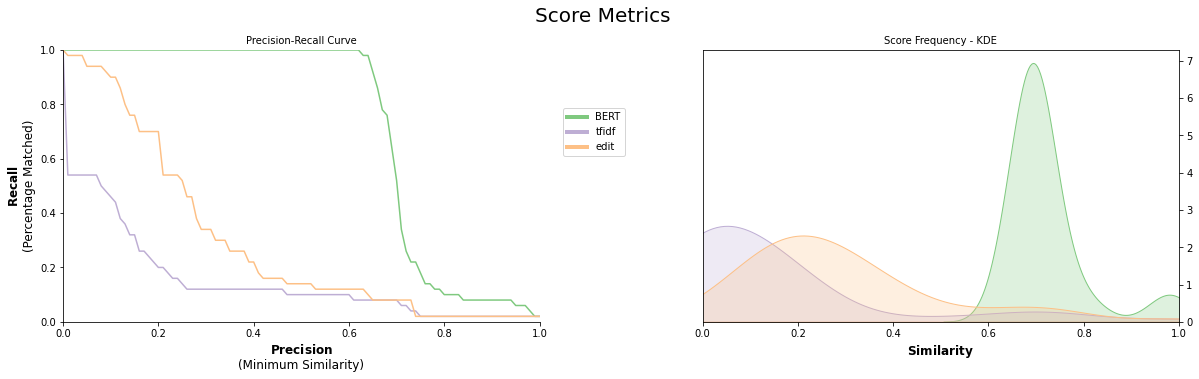

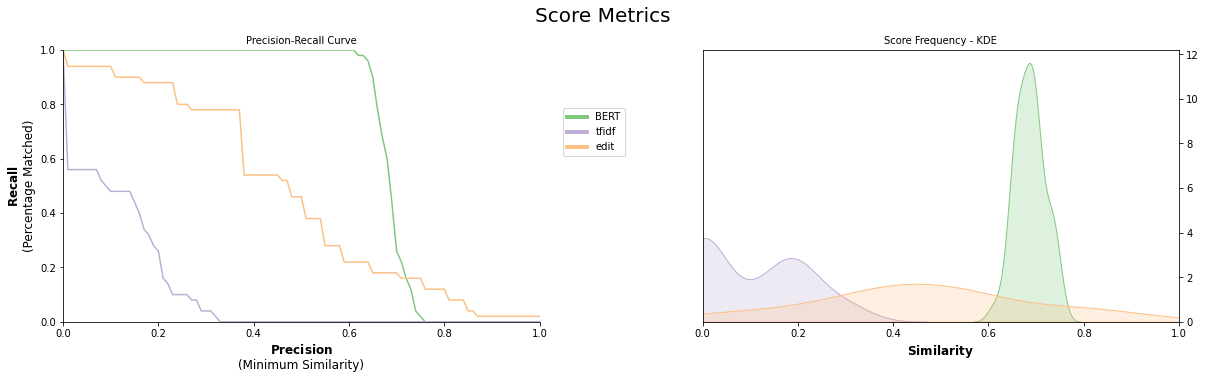

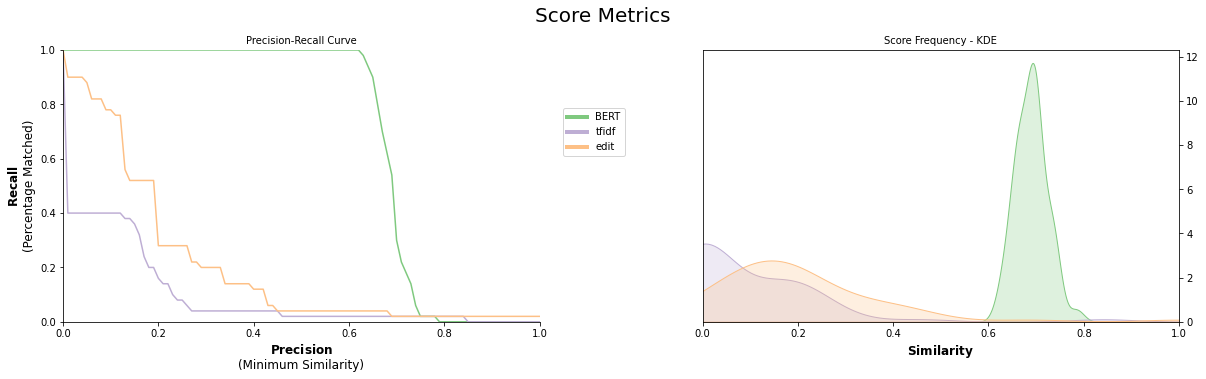

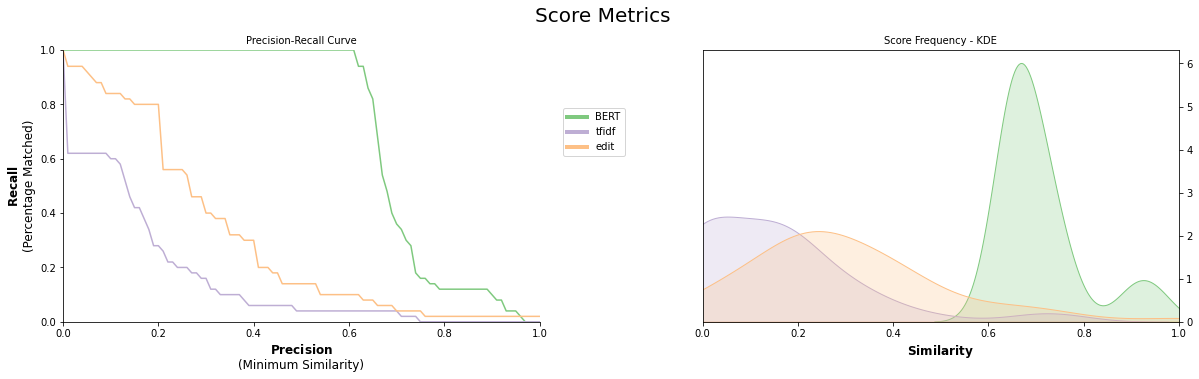

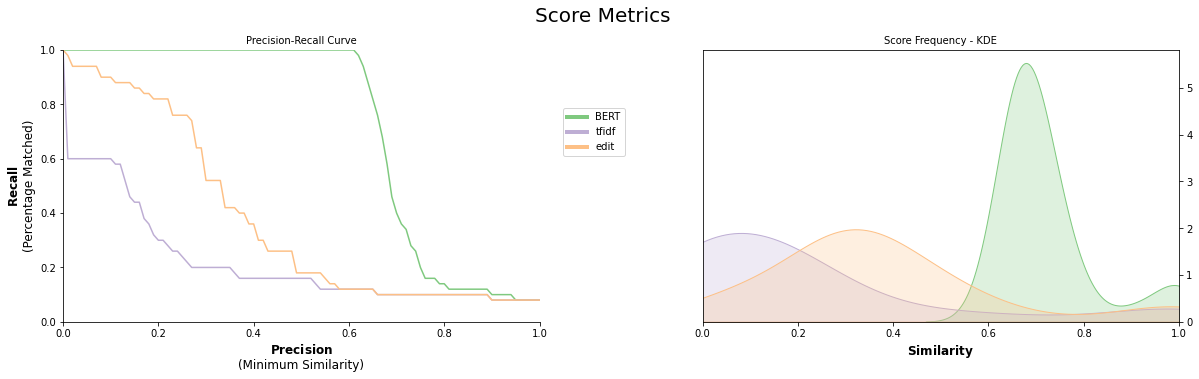

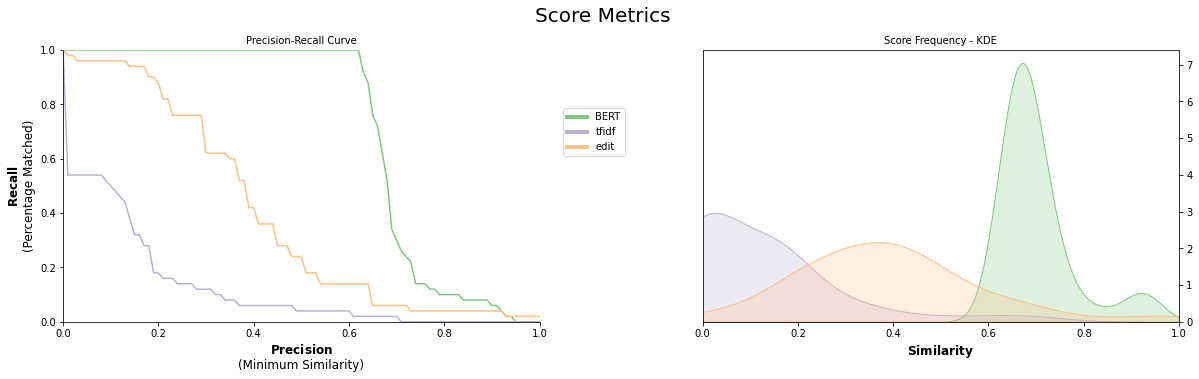

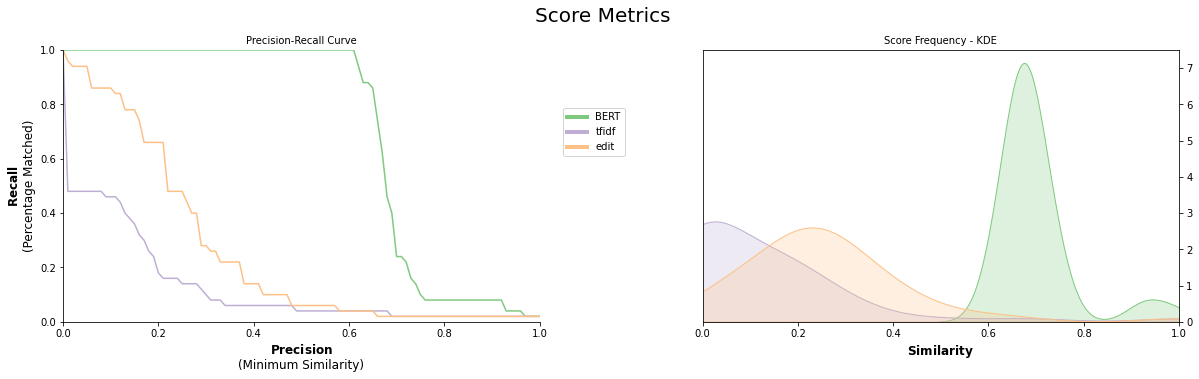

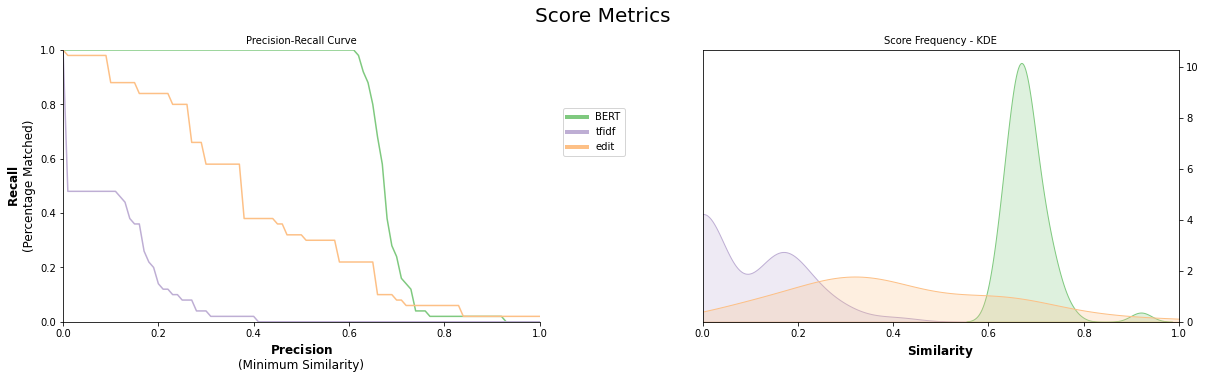

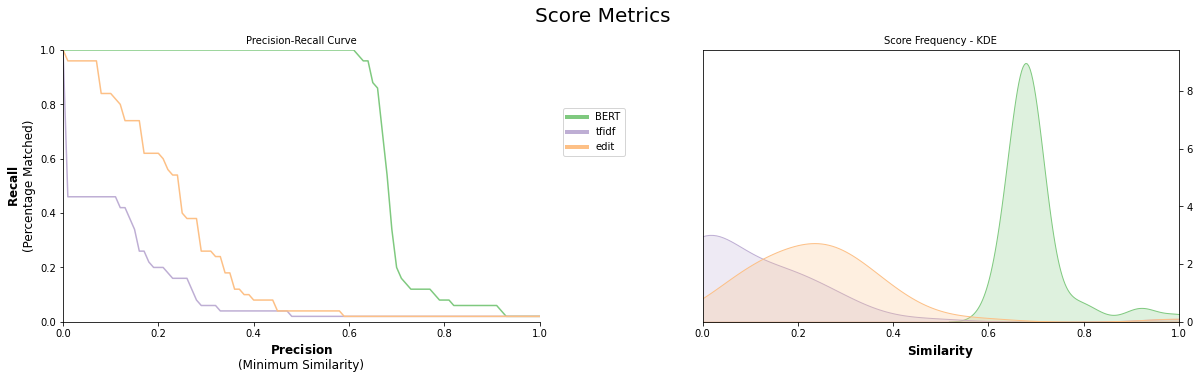

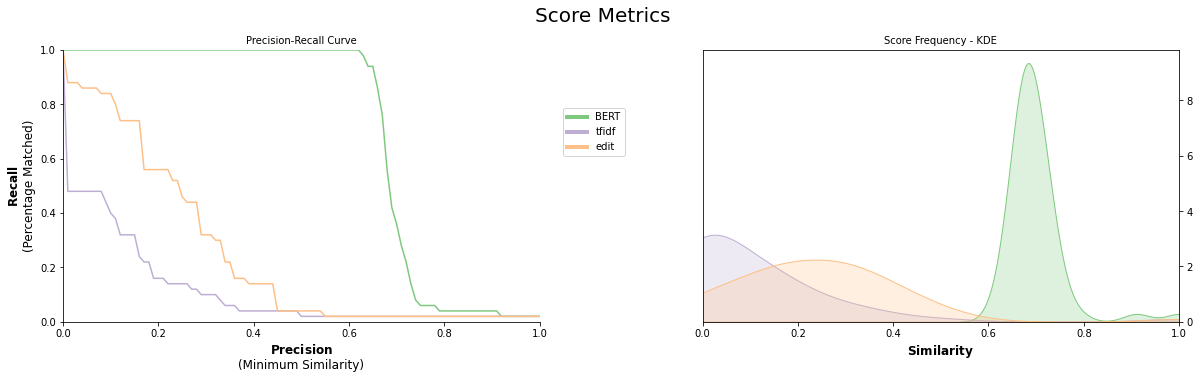

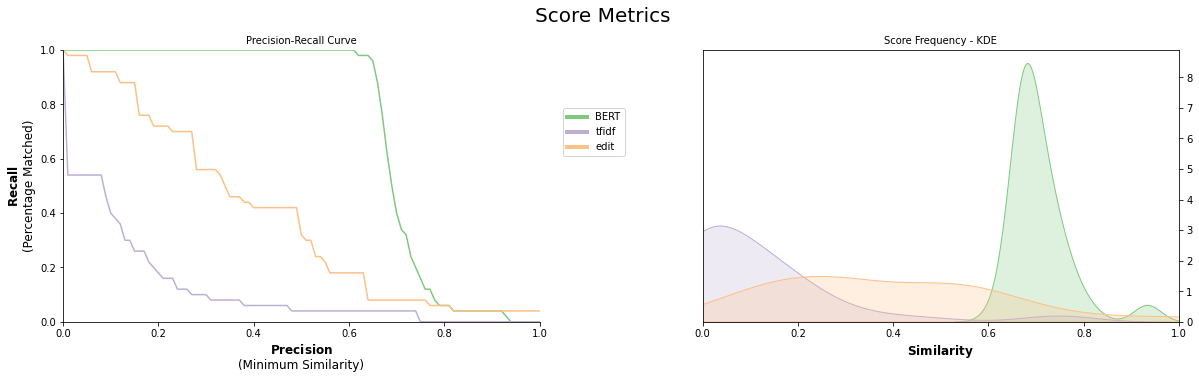

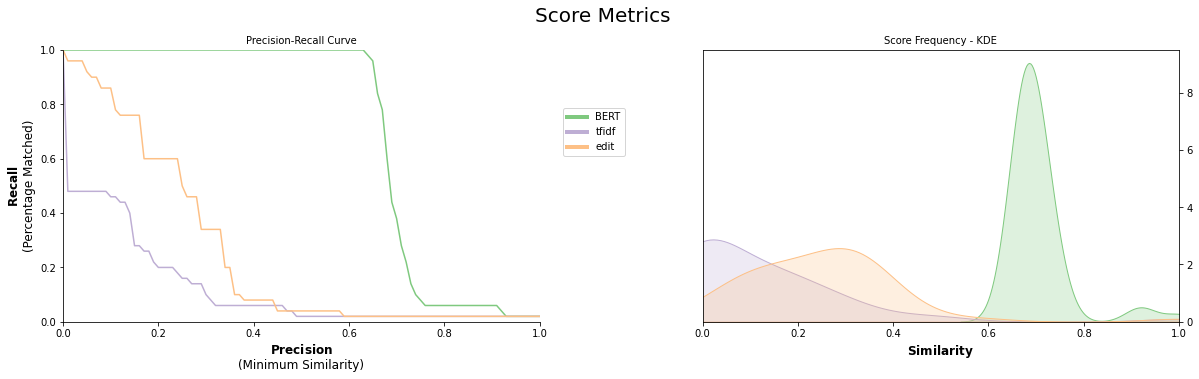

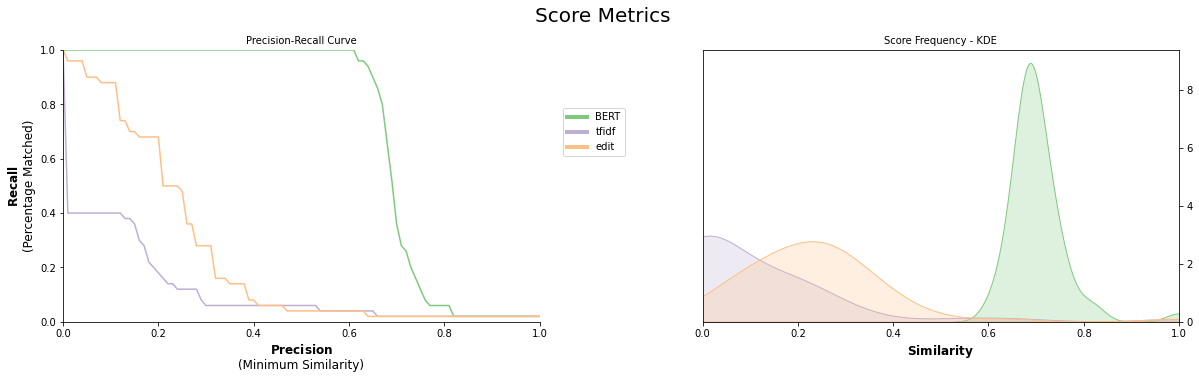

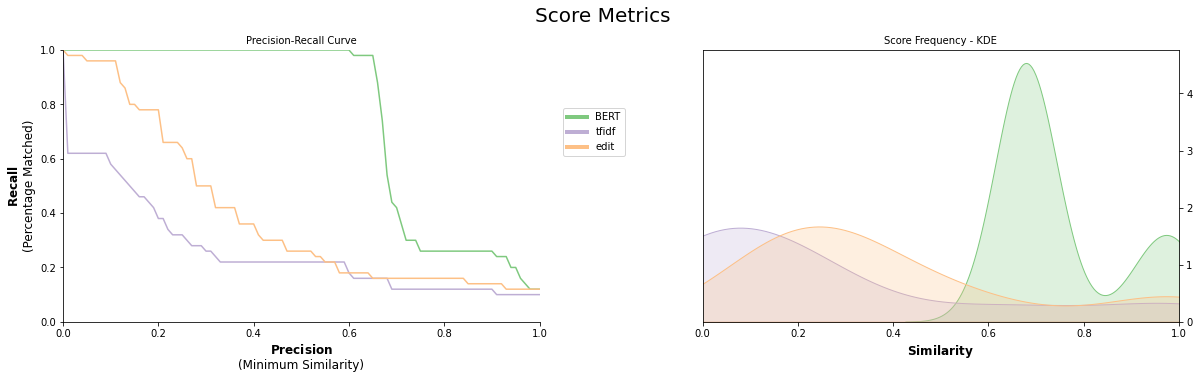

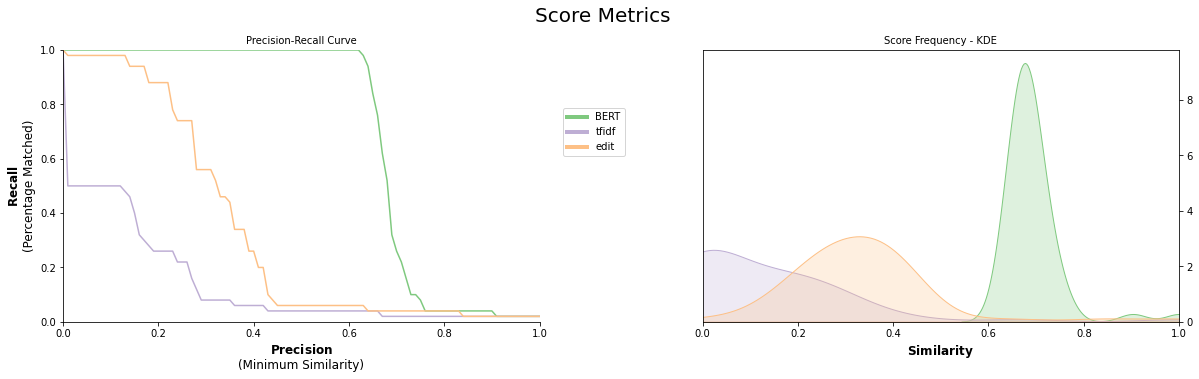

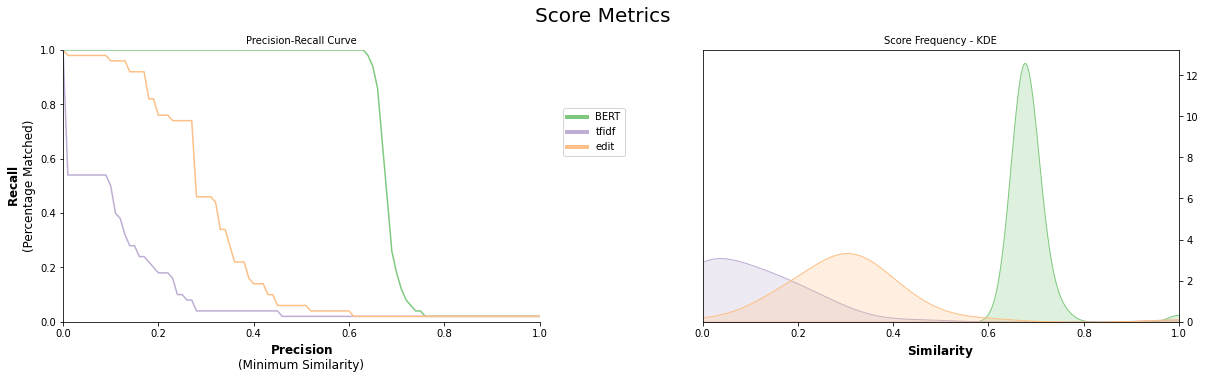

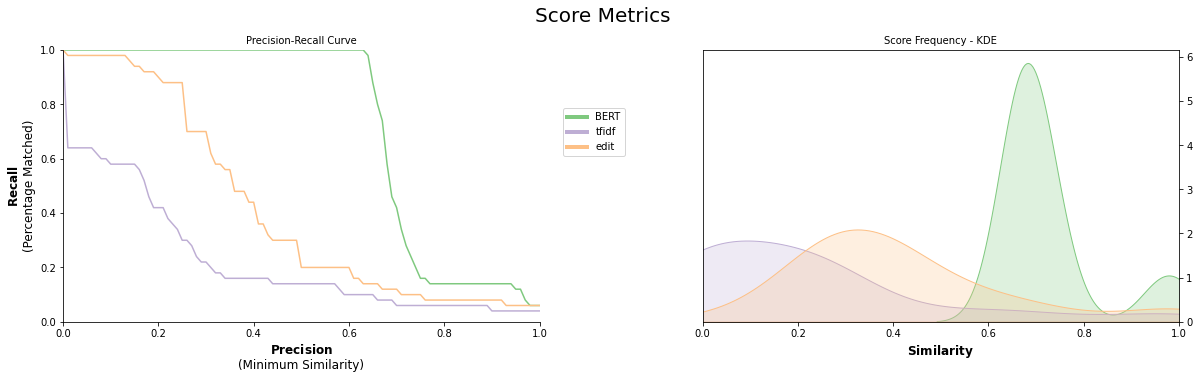

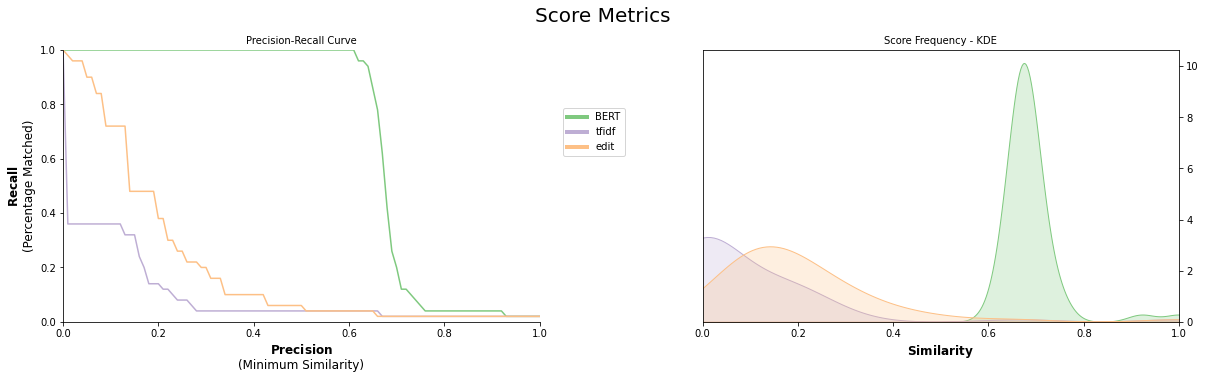

In [14]:
def plot_curves(up_id, git_id):
  upn_list, git_list = list(upnishdas_topics_list[up_id]), list(gita_topics_list[git_id])
  model.match(upn_list, git_list)
  save_path= os.path.join(im_path, 'upn_{}_gita_{}.png'.format(up_id+1, git_id+1))
  model.visualize_precision_recall(kde=True, save_path=save_path)
for upn_id in range(13):
  for git_id in range(5):
    plot_curves(upn_id, git_id)

In [15]:
from sklearn.preprocessing import normalize
from flair.embeddings import DocumentPoolEmbeddings, WordEmbeddings, TokenEmbeddings
from flair.data import Sentence

In [17]:
from typing import List, Union

In [38]:
def get_all_embedding(strings: List[str]) -> np.ndarray:
  """ Create embeddings from a list of strings """
  embeddings_words = []
  for name in strings:
    #print(name)
    sentence = Sentence(name)
    #print(sentence)
    embeddings.embed(sentence)
    for token in sentence:
      embeddings_words.append(token.embedding.cpu().numpy())
  #print(embeddings_words)
  return np.array(normalize(embeddings_words), dtype="double")

In [39]:
top1_upn_embed = get_all_embedding(list(upnishdas_topics_list[0]))
top1_upn_embed.shape

(50, 768)